#Initiations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [3]:
#Dataframes reading and merging
df = pd.read_csv("Data.csv")
ncap_df = pd.read_csv("NCAP_Funding.csv")
state_df = pd.read_csv("State_data.csv")

ncap_df.rename(columns={"State": "state", "City":"city"}, inplace=True)
state_df.rename(columns={"State": "state", "Area (km2)":"Area"}, inplace=True)
state_df["Population Density"] = state_df["Population"] /state_df["Area"]

df = df.merge(state_df, on="state", how="left")
df = df.merge(ncap_df, on=["state", "city"], how="left")

In [ ]:
# Extract useful time components
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["year"] = df["Timestamp"].dt.year
df["month"] = df["Timestamp"].dt.month
df["day"] = df["Timestamp"].dt.day
df["weekday"] = df["Timestamp"].dt.weekday  # 0 = Monday, 6 = Sunday
df["weekend"] = df["weekday"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

#String to Numeric Data for NCAP Data

df['Amount released during FY 2019-20'] = pd.to_numeric(df['Amount released during FY 2019-20'], errors='coerce')
df['Amount released during FY 2020-21'] = pd.to_numeric(df['Amount released during FY 2020-21'], errors='coerce')
df['Amount released during FY 2021-22'] = pd.to_numeric(df['Amount released during FY 2021-22'], errors='coerce')


ncap_df['Amount released during FY 2019-20'] = pd.to_numeric(ncap_df['Amount released during FY 2019-20'], errors='coerce')
ncap_df['Amount released during FY 2020-21'] = pd.to_numeric(ncap_df['Amount released during FY 2020-21'], errors='coerce')
ncap_df['Amount released during FY 2021-22'] = pd.to_numeric(ncap_df['Amount released during FY 2021-22'], errors='coerce')


# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"


df["season"] = df["month"].apply(get_season)

# Spatial aggregation




**1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?**

In [ ]:
state_pm25_avg = df.groupby("state")["PM2.5"].mean()

highest_pm25_state = state_pm25_avg.idxmax()
highest_pm25_value = state_pm25_avg.max()

print(f"The state with the highest average PM2.5 concentration is {highest_pm25_state} with {highest_pm25_value:.2f} µg/m³.")

The state with the highest average PM2.5 concentration is Delhi with 104.10 µg/m³.


**2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?**

In [ ]:
df_2023 = df[df["year"] == 2023]

hazardous_days = df_2023[df_2023["PM2.5"] > 300].groupby("state")["day"].nunique()

most_hazardous_state = hazardous_days.idxmax()
max_days = hazardous_days.max()

print(f"The state with the most days having hazardous PM2.5 levels in 2023 is {most_hazardous_state} with {max_days} days.")


The state with the most days having hazardous PM2.5 levels in 2023 is Delhi with 27 days.


**3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023?**


In [ ]:
state_pm25_std = df_2023.groupby("state")["PM2.5"].std()

highest_variability_state = state_pm25_std.idxmax()
highest_variability_value = state_pm25_std.max()

print(f"The state with the highest variability in PM2.5 levels in 2023 is {highest_variability_state} with a standard deviation of {highest_variability_value:.2f} µg/m³.")

The state with the highest variability in PM2.5 levels in 2023 is Delhi with a standard deviation of 82.80 µg/m³.


**4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?**

In [ ]:
covid_period_df = df[(df["year"] == 2020) | (df["year"] == 2021)]

state_pm25_avg_covid = covid_period_df.groupby("state")["PM2.5"].mean()

lowest_pm25_state_covid = state_pm25_avg_covid.idxmin()
lowest_pm25_value_covid = state_pm25_avg_covid.min()

print(f"The state with the lowest average PM2.5 levels during the Covid period (2020-2021) is {lowest_pm25_state_covid} with an average of {lowest_pm25_value_covid:.2f} µg/m³.")


The state with the lowest average PM2.5 levels during the Covid period (2020-2021) is Mizoram with an average of 14.32 µg/m³.


#Temporal Aggregation

**1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.**

In [ ]:
aug_2020_df = df[(df["month"] == 8) & (df["year"] == 2020)]

highest_pm25_station = aug_2020_df.loc[aug_2020_df["PM2.5"].idxmax(), "station"]
highest_pm25_value = aug_2020_df["PM2.5"].max()

print(f"The station with the highest PM2.5 value in August 2020 is {highest_pm25_station} with a value of {highest_pm25_value} µg/m³.")

The station with the highest PM2.5 value in August 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with a value of 805.51 µg/m³.


**2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.**

**[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?**


In [ ]:
df_station_2018 = df[(df["year"] == 2018) & (df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

seasonal_avg = df_station_2018.groupby("season")["PM2.5"].mean()

most_polluted_season = seasonal_avg.idxmax()
highest_avg_pm25 = seasonal_avg.max()

print(f"The season with the highest pollution in 2018 at the given stations is {most_polluted_season} with an average PM2.5 concentration of {highest_avg_pm25:.2f} µg/m³.")


The season with the highest pollution in 2018 at the given stations is Winter with an average PM2.5 concentration of 67.49 µg/m³.


In [ ]:
seasonal_avg

,PM2.5
season,
Monsoon,34.425196
Summer,NaN
Winter,67.492344


Potential factors on why certain seasons are generally more polluted than others

1. Winter (Highest Pollution) – Temperature inversion traps pollutants, low wind speed, and increased biomass burning cause smog.

2. Summer (Moderate Pollution) – High temperatures increase dust storms and photochemical reactions, leading to ozone formation.

3. Monsoon (Lowest Pollution) – Rain washes out pollutants, high humidity settles particles, and strong winds improve air quality.

**3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:**

1. Calculate the monthly average PM2.5 for weekdays and weekends separately

2.   X-axis: Months (January to December).
3.   Y-axis: Average PM2.5 levels.
4.   Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.






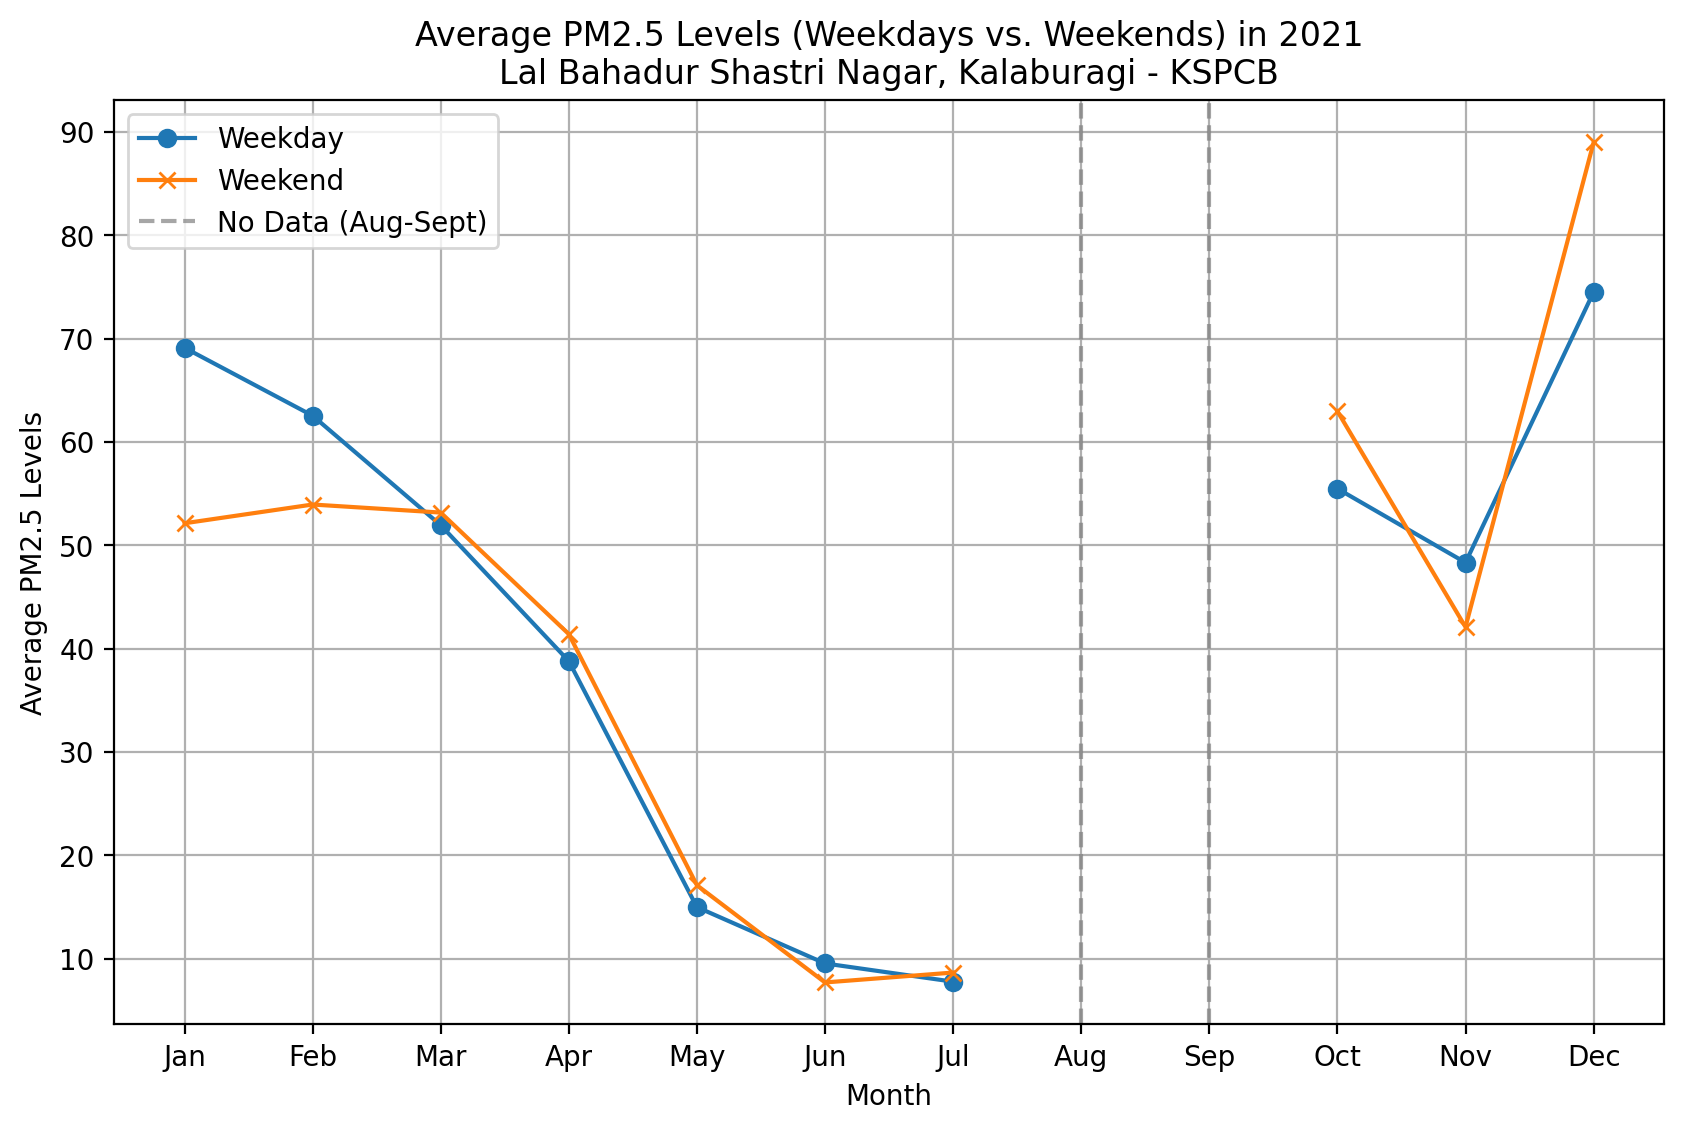

In [ ]:
station_data_2021 = df[(df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB") & (df["year"] == 2021)]

monthly_avg_pm25 = station_data_2021.groupby(["month", "weekend"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Weekday"], label="Weekday", marker='o')
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Weekend"], label="Weekend", marker='x')

plt.axvline(x=8, linestyle="dashed", color="gray", alpha=0.7, label="No Data (Aug-Sept)")
plt.axvline(x=9, linestyle="dashed", color="gray", alpha=0.7)

plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Average PM2.5 Levels (Weekdays vs. Weekends) in 2021\nLal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()

# Spatio-temporal aggregation

**1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?**


In [ ]:
df_2022 = df[df["year"] == 2022]

seasonal_pm25 = df_2022.groupby(["state", "season"])["PM2.5"].mean().unstack()

seasonal_pm25 = seasonal_pm25[["Summer", "Monsoon"]]

seasonal_pm25["% Change"] = ((seasonal_pm25["Monsoon"] - seasonal_pm25["Summer"]) / seasonal_pm25["Summer"]) * 100

state_max_change = seasonal_pm25["% Change"].abs().idxmax()
max_change_value = seasonal_pm25.loc[state_max_change, "% Change"]

print(f"State with the most change: {state_max_change} ({max_change_value:.2f}%)")

seasonal_pm25_sorted = seasonal_pm25.sort_values("% Change", ascending=True)
seasonal_pm25_sorted

State with the most change: Assam (-61.18%)


season,Summer,Monsoon,% Change
state,,,
Assam,56.337647,21.872292,-61.176419
Mizoram,10.663003,4.368895,-59.027533
Tripura,41.159391,17.839413,-56.657734
Madhya Pradesh,51.369364,22.473271,-56.251607
Nagaland,37.228159,16.287384,-56.249827
Delhi,95.667628,42.769572,-55.293579
West Bengal,45.119246,20.981903,-53.496777
Arunachal Pradesh,32.116292,15.069892,-53.077110
Bihar,75.834868,35.642356,-53.000042


**2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?**

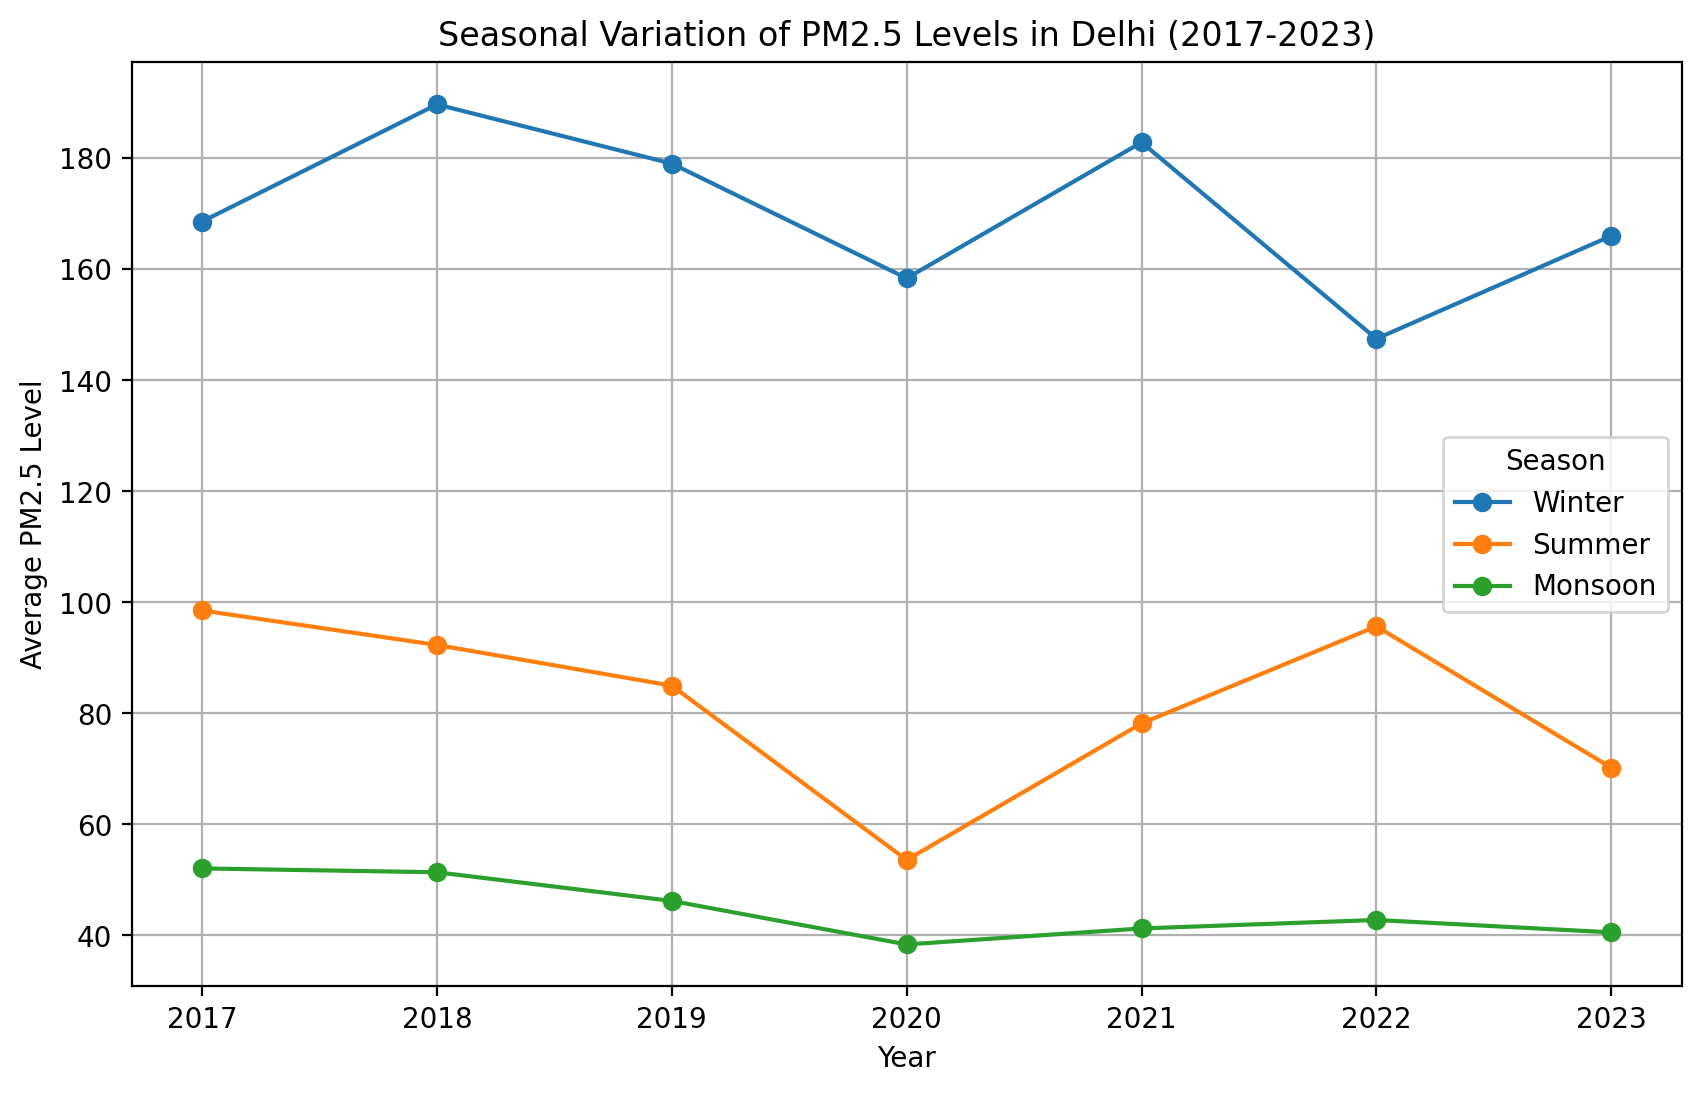

In [ ]:
delhi_data = df[(df["state"] == "Delhi") & (df["year"] >= 2017) & (df["year"] <= 2023)]

seasonal_pm25_delhi = delhi_data.groupby(["year", "season"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 6))

for season in ["Winter", "Summer", "Monsoon"]:
    plt.plot(seasonal_pm25_delhi.index, seasonal_pm25_delhi[season], marker="o", label=season)

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)")
plt.legend(title="Season")
plt.grid(True)

plt.show()


Observations on Seasonal Variation:

1.  Winter has the highest pollution levels due to factors like low temperature, temperature inversion, and increased emissions from heating and firecrackers.
2.  Summer has moderate pollution levels, mainly due to higher dispersion and wind activity.
3. Monsoon shows the lowest pollution levels, as rainfall helps clear out particulate matter.



**3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)**

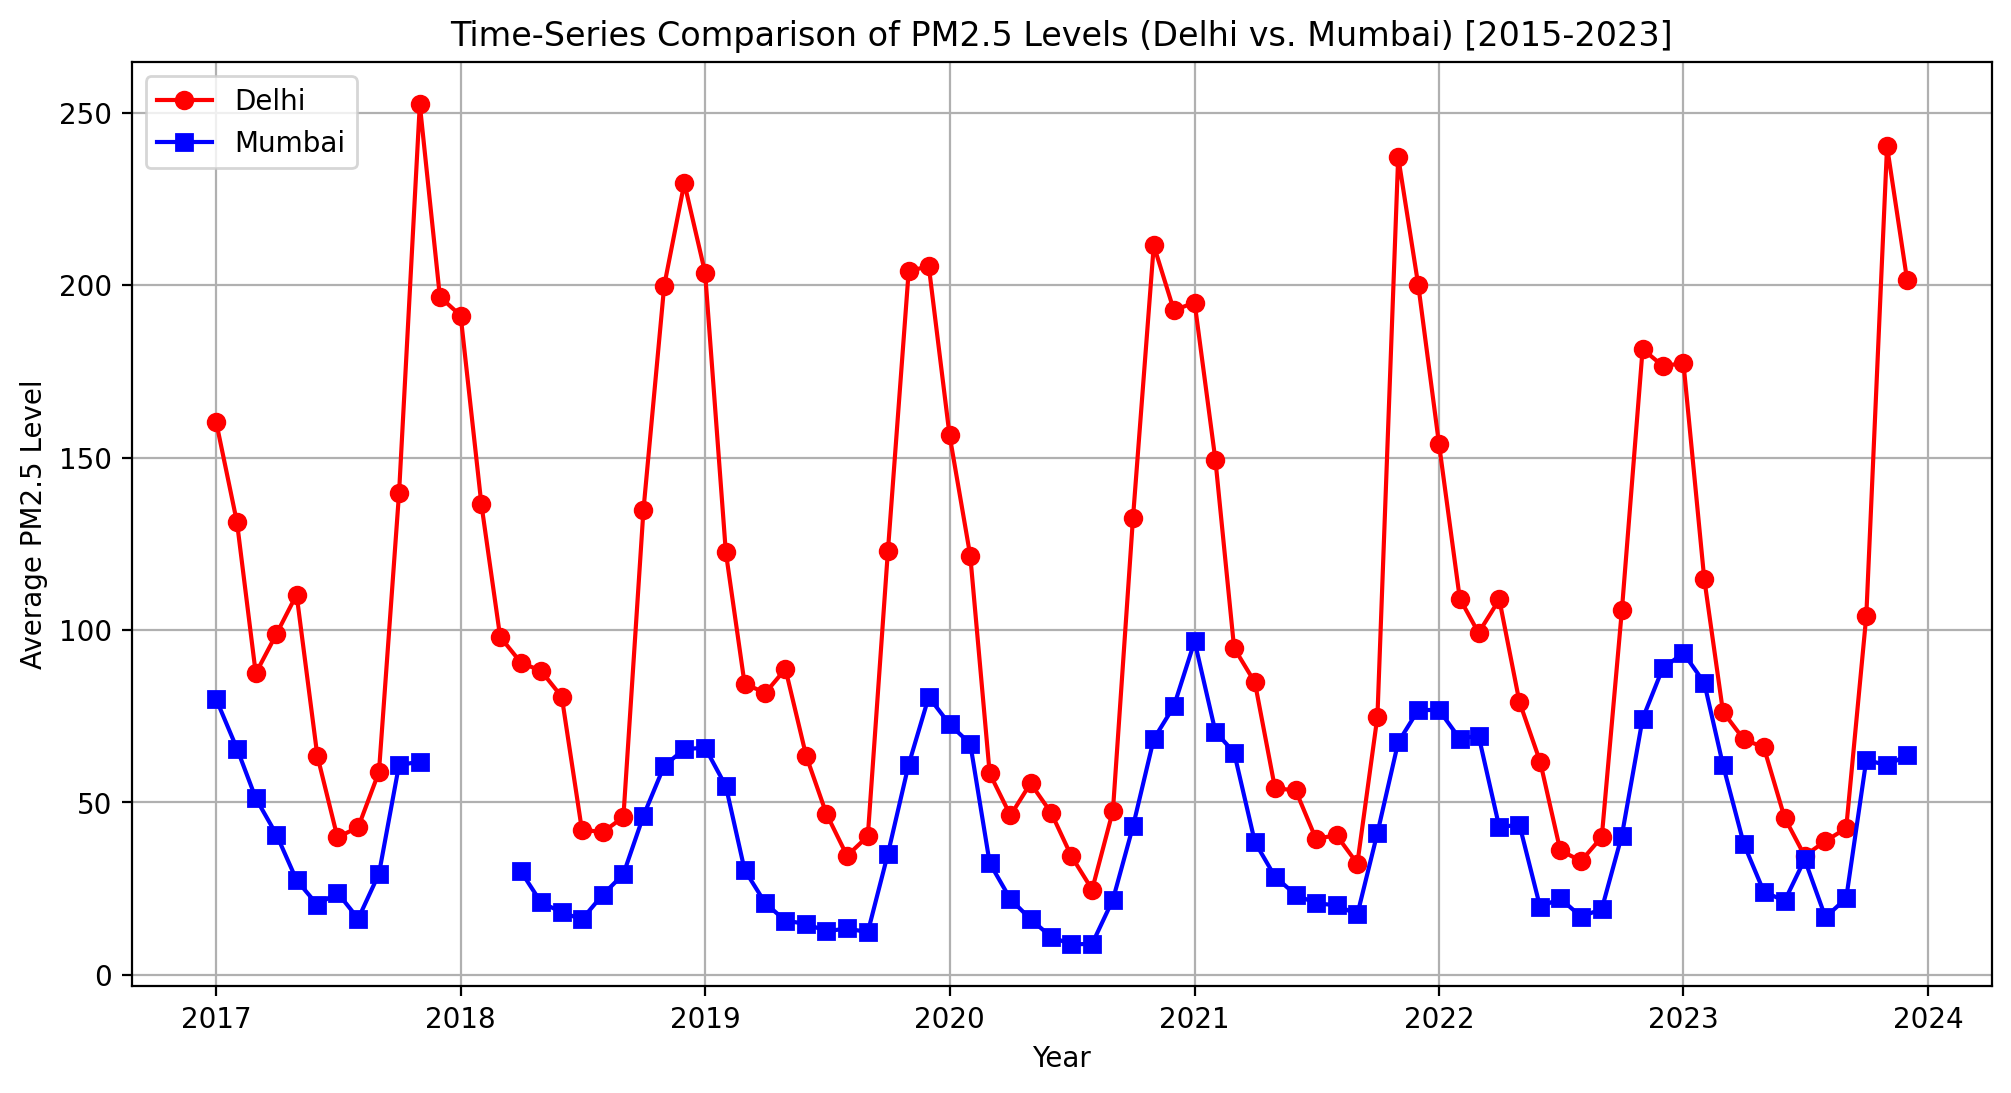

Fluctuation (Standard Deviation) of PM2.5 levels:
Delhi: 62.98
Mumbai: 24.53
Delhi had more fluctuations in PM2.5 levels.


In [ ]:
cities_data = df[(df["state"].isin(["Delhi", "Maharashtra"])) & (df["year"].between(2015, 2023))]

cities_data = cities_data[(cities_data["city"] == "Mumbai") | (cities_data["state"] == "Delhi")]

cities_data["year_month"] = cities_data["Timestamp"].dt.to_period("M")
city_pm25 = cities_data.groupby(["year_month", "state"])["PM2.5"].mean().unstack()

city_pm25.index = city_pm25.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(city_pm25.index, city_pm25["Delhi"], label="Delhi", color="red", marker="o", linestyle="-")
plt.plot(city_pm25.index, city_pm25["Maharashtra"], label="Mumbai", color="blue", marker="s", linestyle="-")

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Time-Series Comparison of PM2.5 Levels (Delhi vs. Mumbai) [2015-2023]")
plt.legend()
plt.grid(True)

plt.show()

fluctuation_delhi = city_pm25["Delhi"].std()
fluctuation_mumbai = city_pm25["Maharashtra"].std()

print(f"Fluctuation (Standard Deviation) of PM2.5 levels:")
print(f"Delhi: {fluctuation_delhi:.2f}")
print(f"Mumbai: {fluctuation_mumbai:.2f}")

# Compare fluctuations
if fluctuation_delhi > fluctuation_mumbai:
    print("Delhi had more fluctuations in PM2.5 levels.")
else:
    print("Mumbai had more fluctuations in PM2.5 levels.")

# Population-Based

**1. Which state in India has the highest number of monitoring stations relative to its population?**

In [ ]:
unique_stations = df[["state", "station"]].drop_duplicates()
stations_per_state = unique_stations["state"].value_counts()

stations_population = state_df[["state", "Population"]].merge(stations_per_state.rename("num_stations"), on="state", how="left")

stations_population["stations_per_million"] = stations_population["num_stations"] / (stations_population["Population"] / 1e6)

highest_state = stations_population.loc[stations_population["stations_per_million"].idxmax()]

state_name = highest_state["state"]
stations_per_million = highest_state["stations_per_million"]

print(f"The state with the highest number of monitoring stations relative to its population is: {state_name} with {stations_per_million:.2f} stations per million people.")


The state with the highest number of monitoring stations relative to its population is: Chandigarh with 2.84 stations per million people.


**2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.**

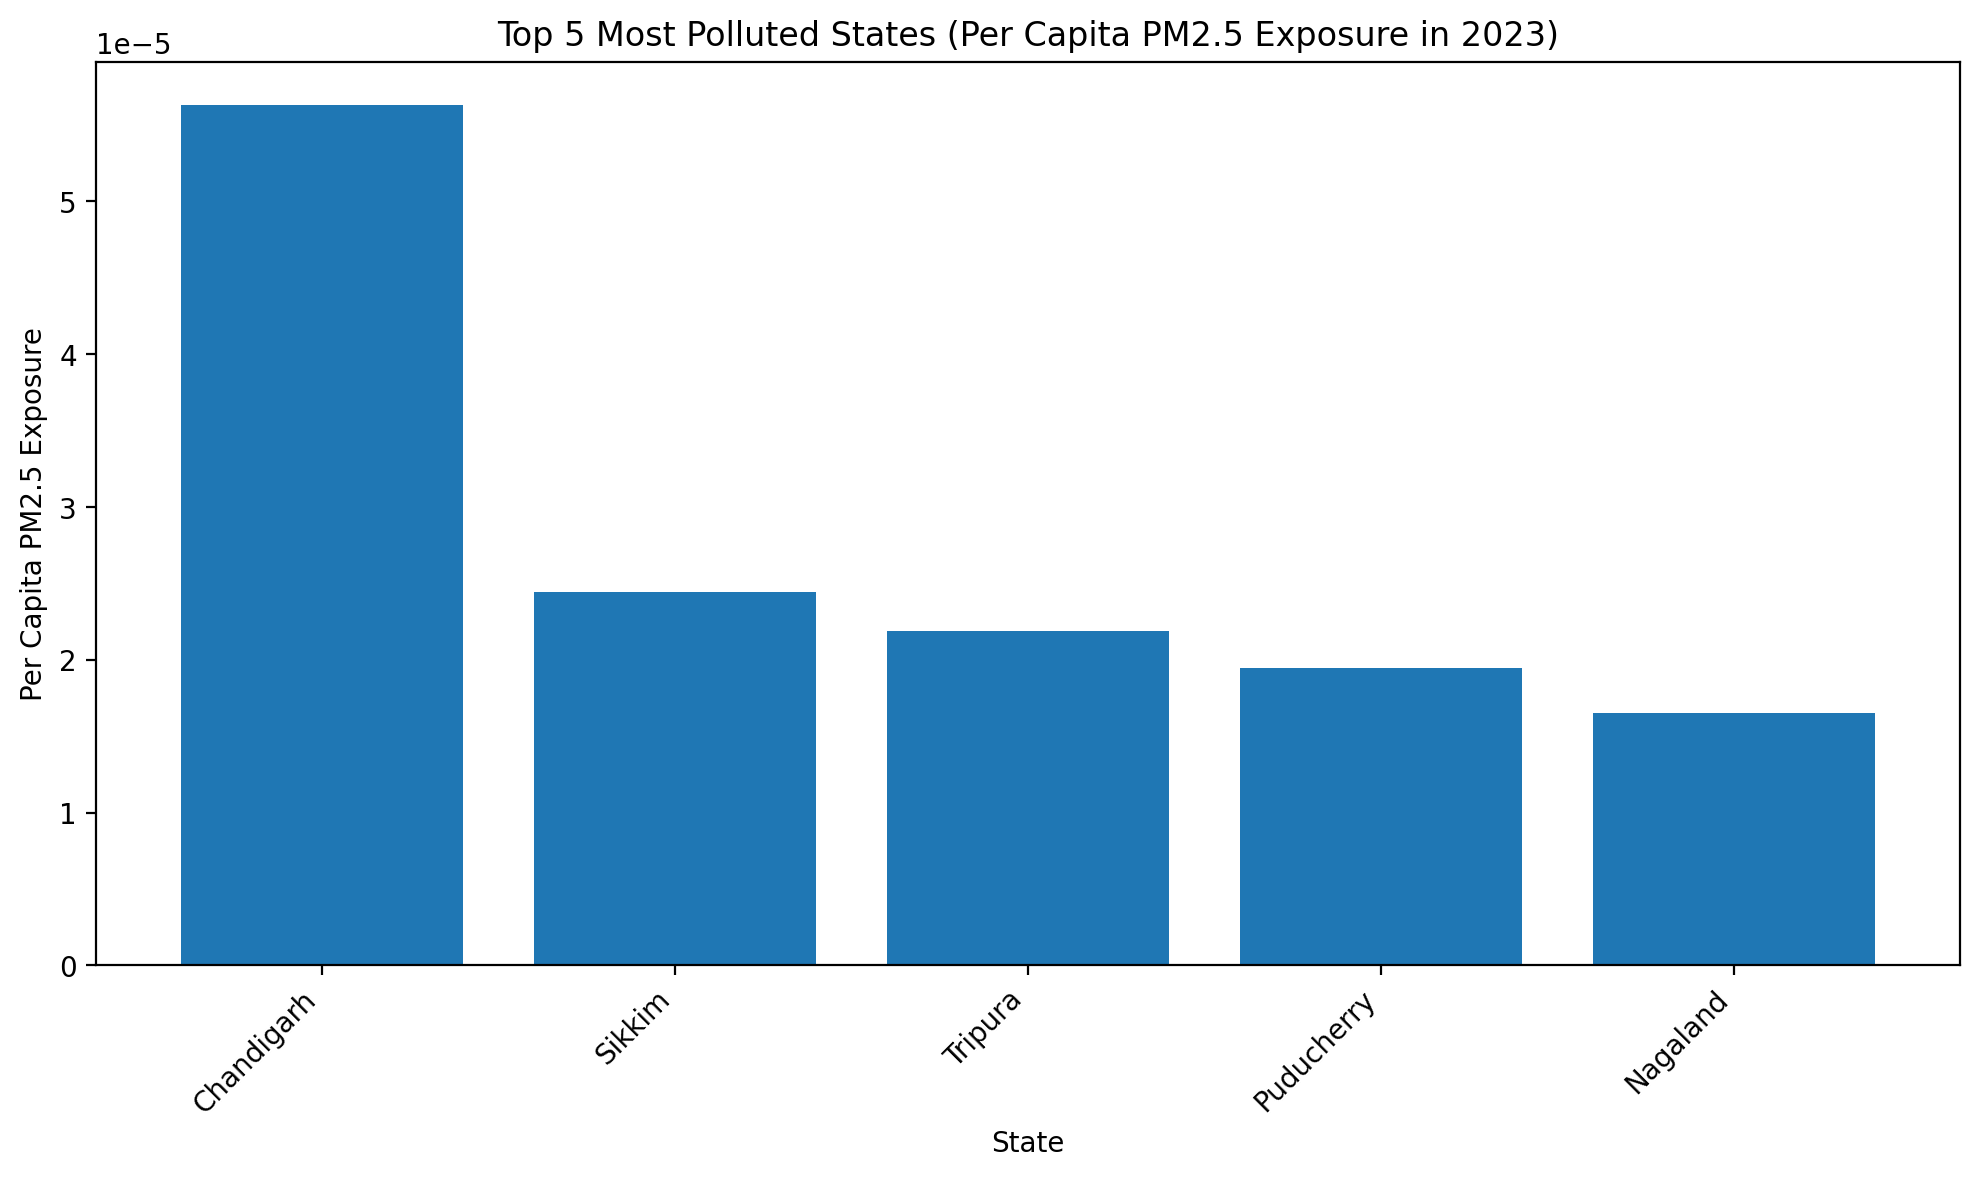

In [ ]:
df_2023 = df[df["year"] == 2023]
per_capita_pm25 = df_2023.groupby("state")["PM2.5"].mean() / df_2023.groupby("state")["Population"].mean()

top_5_polluted = per_capita_pm25.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_polluted.index, top_5_polluted.values)
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure in 2023)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


**3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?**
1. X-axis: Population density (people per square kilometer).
2. Y-axis: Average PM2.5 concentration.
3. Use a scatter plot to show the relationship, where each point represents a state.


Correlation coefficient: 0.5108760390552376


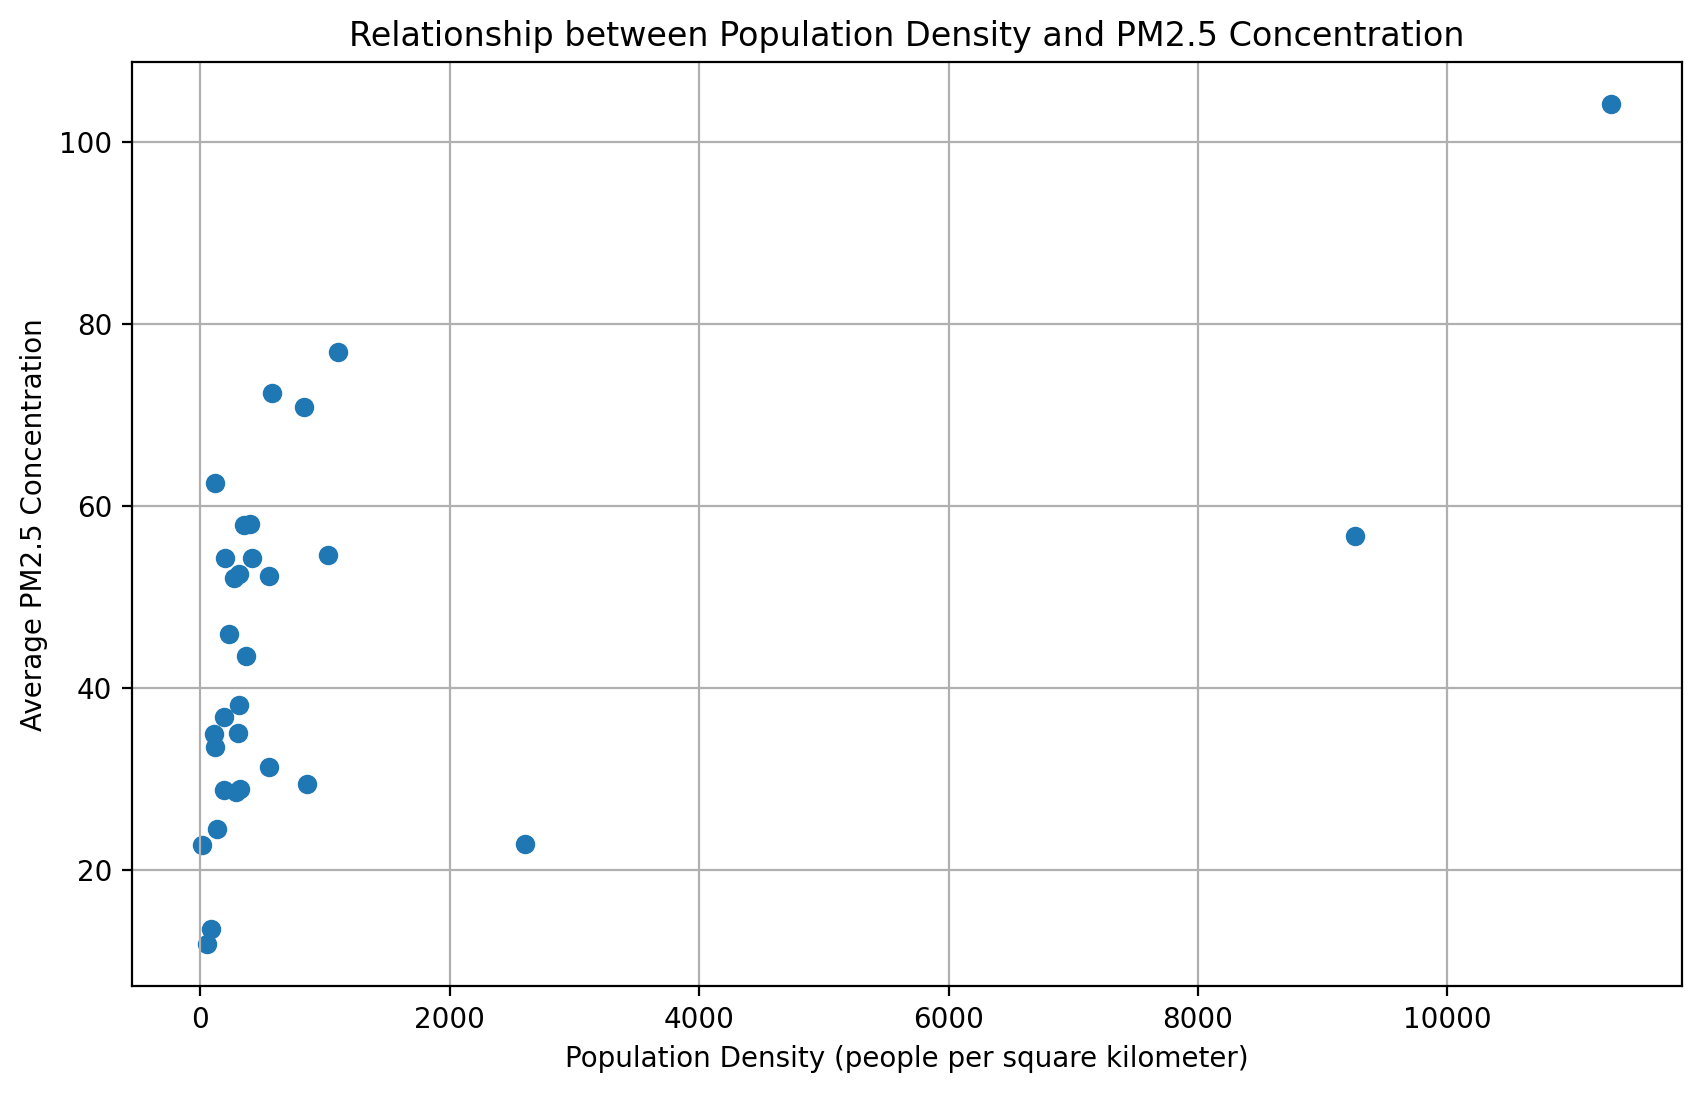


There is a strong positive correlation between population density and PM2.5 concentration.


In [ ]:
state_stats = df.groupby('state').agg({'PM2.5': 'mean', 'Population Density': 'first'})

plt.figure(figsize=(10, 6))
plt.scatter(state_stats['Population Density'], state_stats['PM2.5'])
plt.xlabel('Population Density (people per square kilometer)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship between Population Density and PM2.5 Concentration')
plt.grid(True)

correlation_coefficient = state_stats['Population Density'].corr(state_stats['PM2.5'])
print(f"Correlation coefficient: {correlation_coefficient}")

plt.show()

if correlation_coefficient > 0.5 :
  print("\nThere is a strong positive correlation between population density and PM2.5 concentration.")
elif correlation_coefficient > 0:
  print("\nThere is a weak positive correlation between population density and PM2.5 concentration.")
elif correlation_coefficient < -0.5:
  print("\nThere is a strong negative correlation between population density and PM2.5 concentration.")
elif correlation_coefficient < 0:
  print("\nThere is a weak negative correlation between population density and PM2.5 concentration.")
else:
  print("\nThere is no linear correlation between population density and PM2.5 concentration.")


# Area Based

**1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.**
1. X-axis: States.
2. Y-axis: PM2.5 concentration per square kilometer.
3. Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


The state with the highest PM2.5 concentration per square kilometer is Delhi with 6673.12 µg/m³ per km².



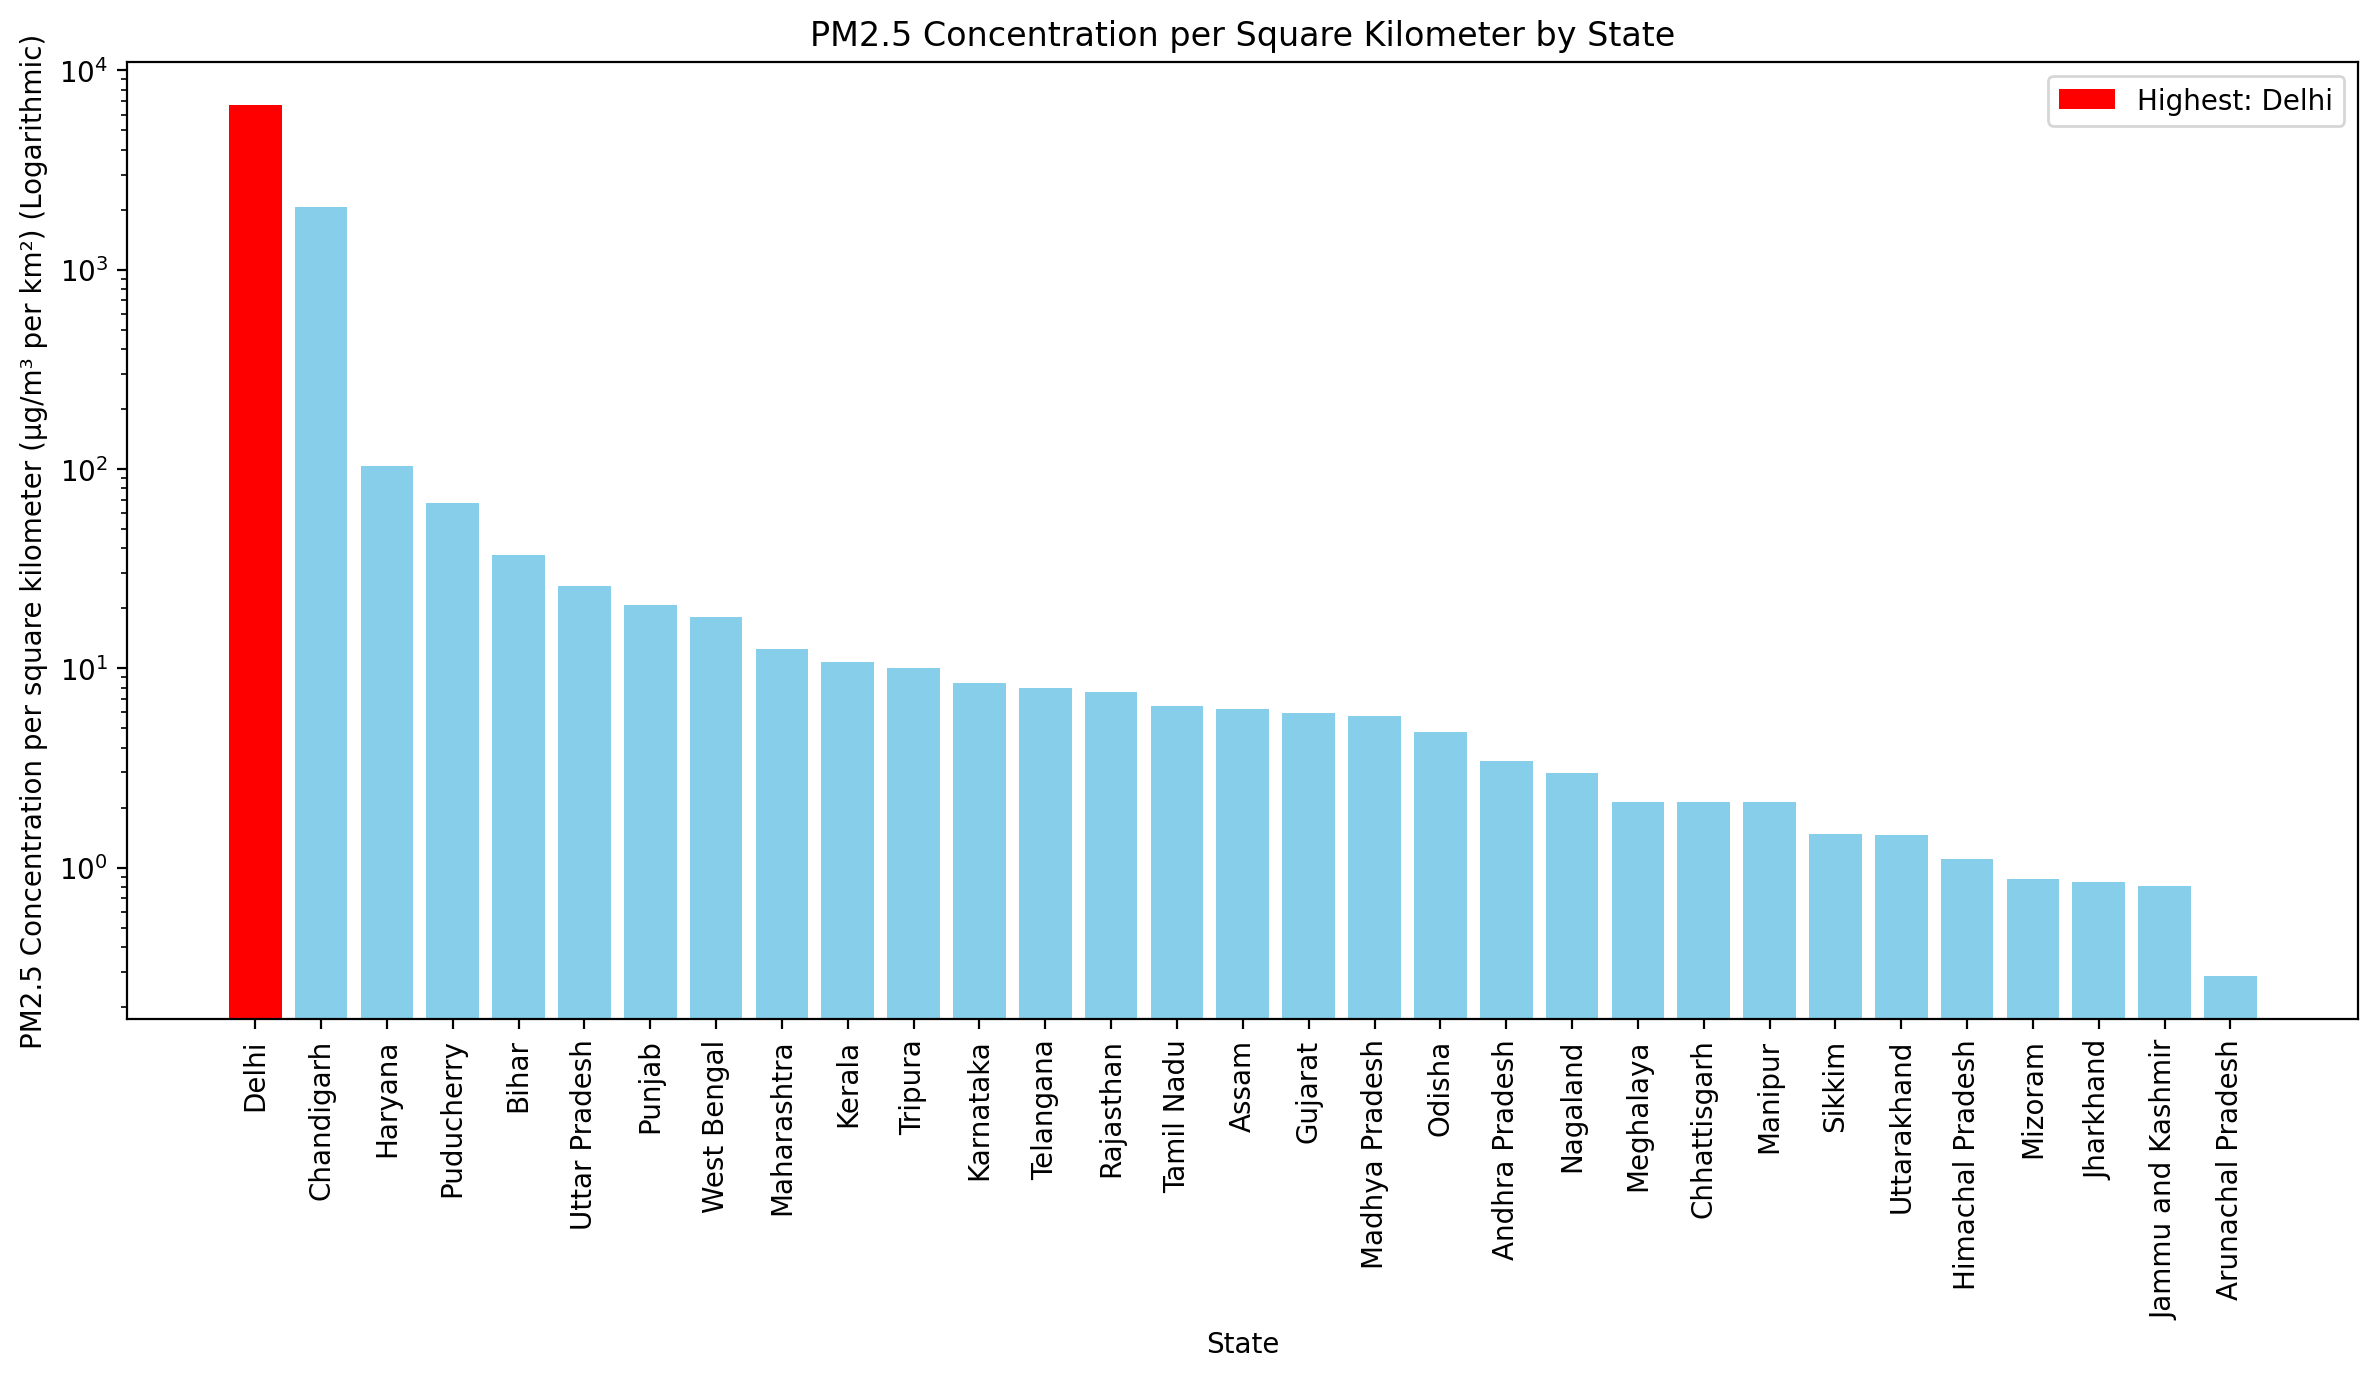

In [ ]:
state_pm25_area = df.groupby("state")["PM2.5"].sum() / df.groupby("state")["Area"].first()

state_pm25_area_sorted = state_pm25_area.sort_values(ascending=False)

highest_pm25_area_state = state_pm25_area_sorted.idxmax()
highest_pm25_area_value = state_pm25_area_sorted.max()

print(f"The state with the highest PM2.5 concentration per square kilometer is {highest_pm25_area_state} with {highest_pm25_area_value:.2f} µg/m³ per km².\n")

plt.figure(figsize=(12, 7))
plt.bar(state_pm25_area_sorted.index, state_pm25_area_sorted.values, color="skyblue")

plt.xlabel("State")
plt.ylabel("PM2.5 Concentration per square kilometer (µg/m³ per km²) (Logarithmic)")
plt.title("PM2.5 Concentration per Square Kilometer by State")
plt.xticks(rotation=90)
plt.yscale("log")
plt.tight_layout()

plt.bar(highest_pm25_area_state, highest_pm25_area_value, color="red", label=f"Highest: {highest_pm25_area_state}")
plt.legend()

plt.show()


**2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.**

The state with the highest density of monitoring stations is Delhi with 0.0270 stations per square kilometer.



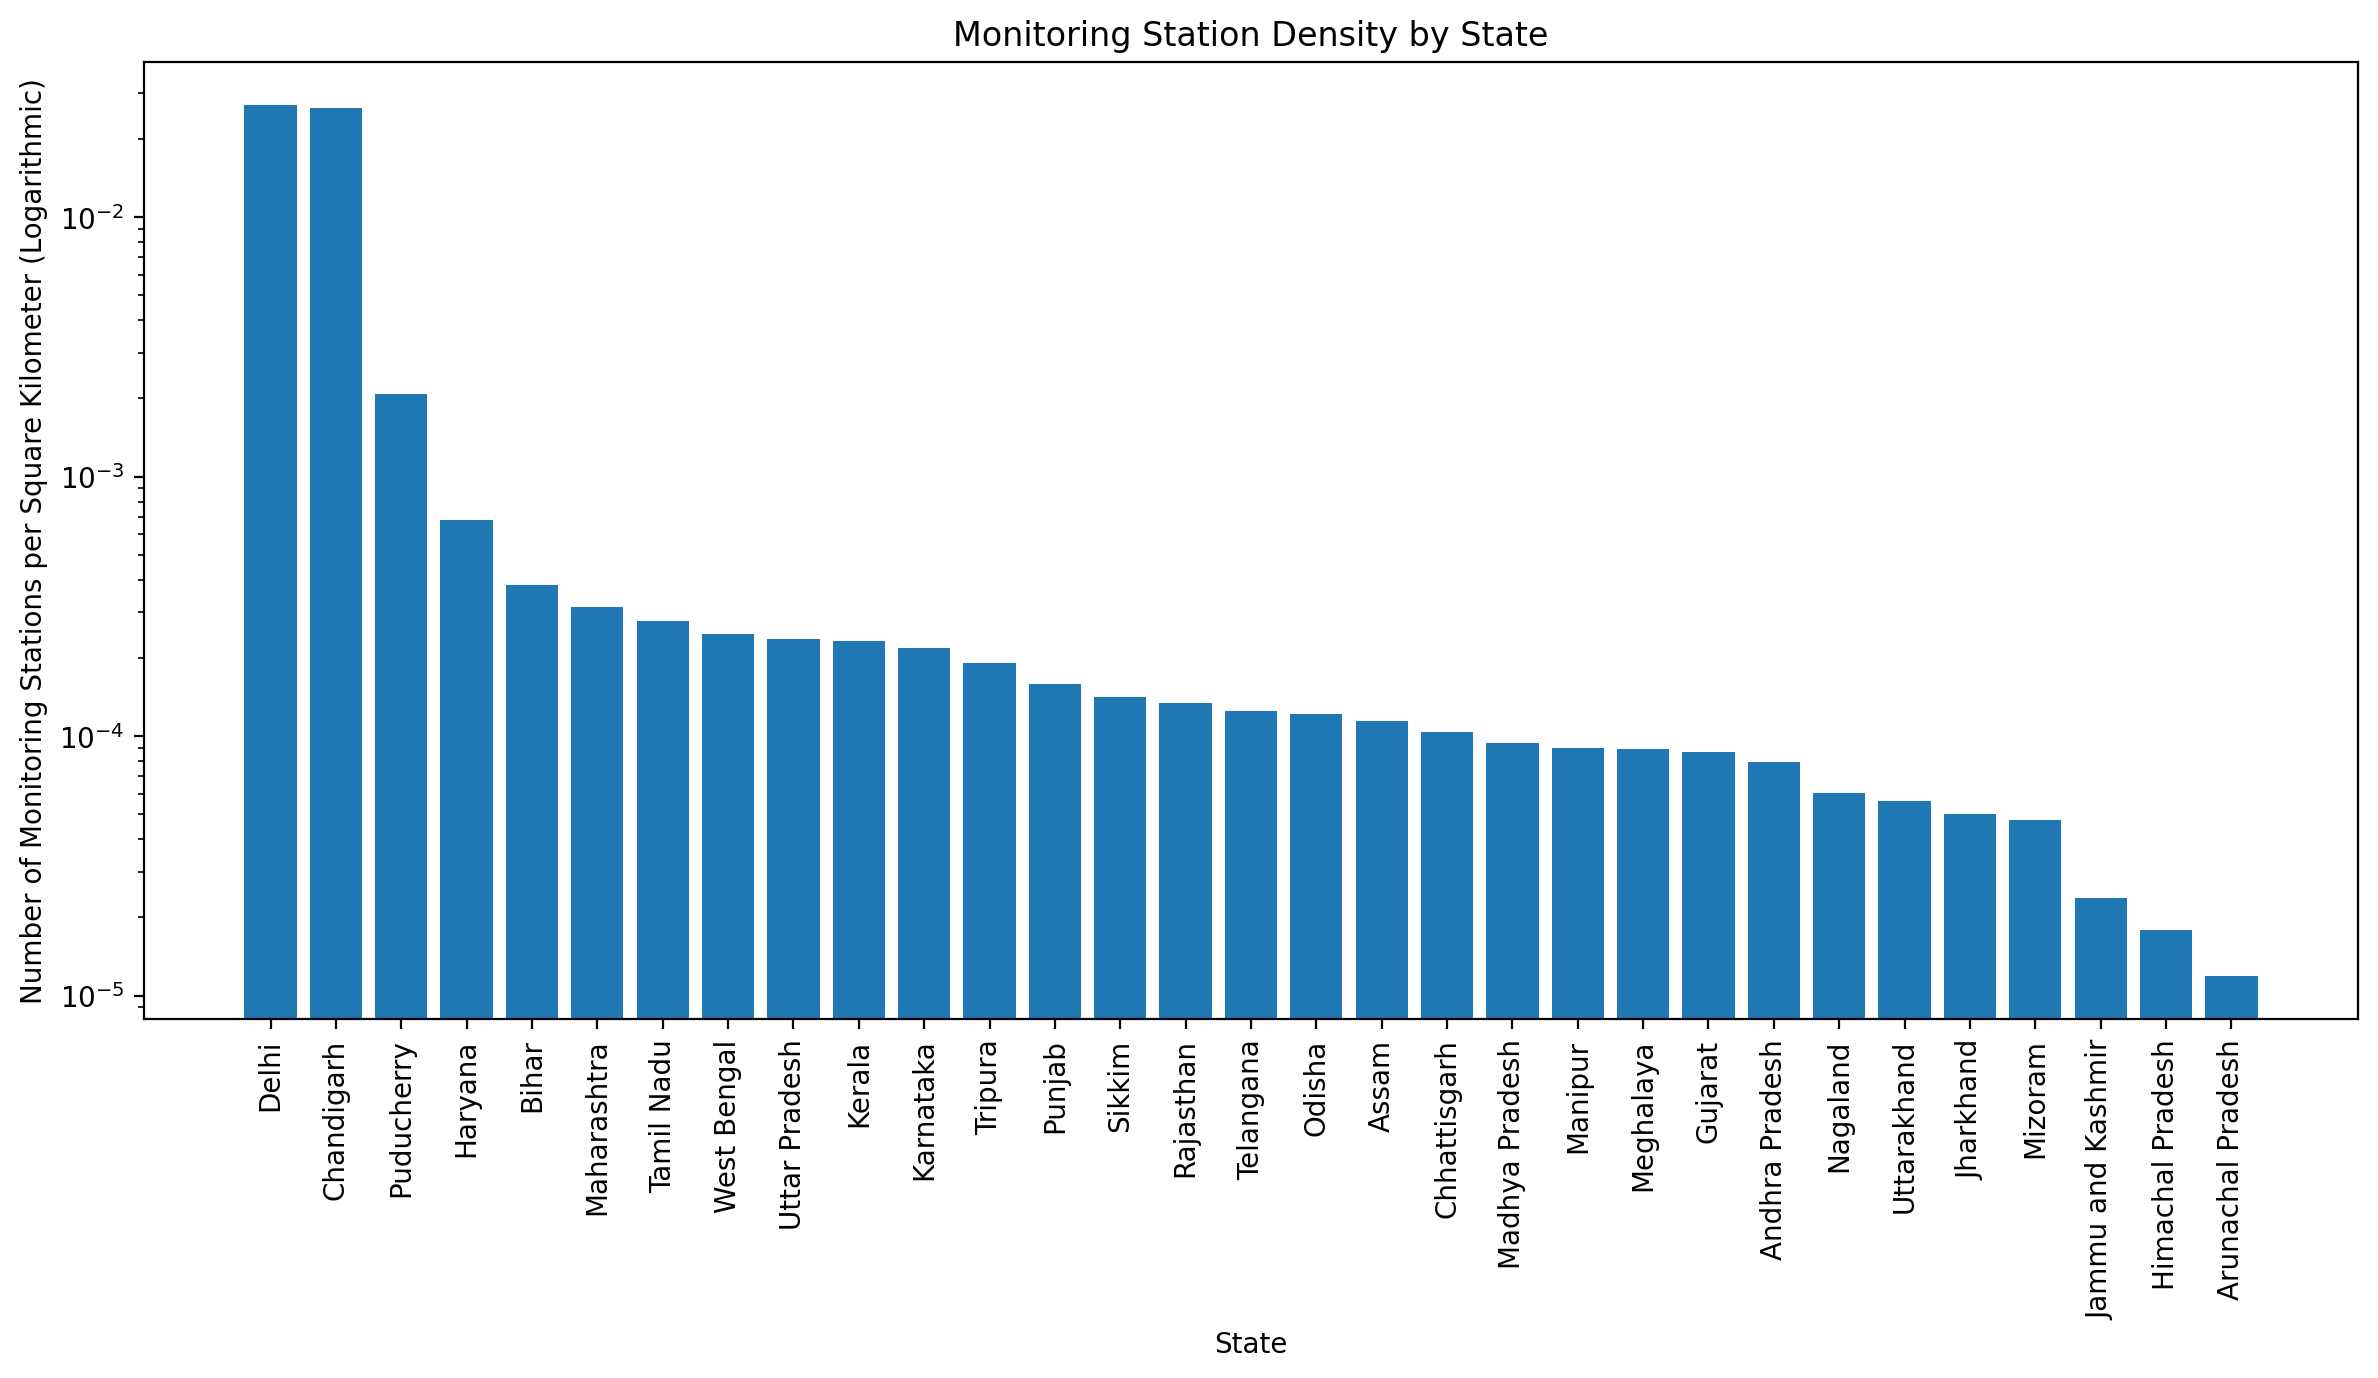

In [ ]:
stations_per_sqkm = df.groupby('state')['station'].nunique() / df.groupby('state')['Area'].first()
stations_per_sqkm = stations_per_sqkm.sort_values(ascending=False)


highest_density_state = stations_per_sqkm.idxmax()
highest_density_value = stations_per_sqkm.max()

print(f"The state with the highest density of monitoring stations is {highest_density_state} with {highest_density_value:.4f} stations per square kilometer.\n")

plt.figure(figsize=(12, 7))
plt.bar(stations_per_sqkm.index, stations_per_sqkm.values)
plt.xlabel("State")
plt.ylabel("Number of Monitoring Stations per Square Kilometer (Logarithmic)")
plt.title("Monitoring Station Density by State")
plt.xticks(rotation=90)
plt.yscale("log")
plt.tight_layout()
plt.show()


**3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.**

In [ ]:
maharashtra_data_2021 = df[(df["state"] == "Maharashtra") & (df["year"] == 2021)]
madhya_pradesh_data_2021 = df[(df["state"] == "Madhya Pradesh") & (df["year"] == 2021)]

avg_pm25_maharashtra = maharashtra_data_2021["PM2.5"].mean()
avg_pm25_madhya_pradesh = madhya_pradesh_data_2021["PM2.5"].mean()

print(f"Average PM2.5 in Maharashtra (2021): {avg_pm25_maharashtra:.2f}")
print(f"Average PM2.5 in Madhya Pradesh (2021): {avg_pm25_madhya_pradesh:.2f}")

maharashtra_pop_density = df[df["state"] == "Maharashtra"]["Population Density"].iloc[0]
madhya_pradesh_pop_density = df[df["state"] == "Madhya Pradesh"]["Population Density"].iloc[0]

print(f"\nPopulation Density:")
print(f"Maharashtra: {maharashtra_pop_density:.2f} people/km²")
print(f"Madhya Pradesh: {madhya_pradesh_pop_density:.2f} people/km²")

if avg_pm25_maharashtra > avg_pm25_madhya_pradesh:
    print("\nMaharashtra has higher average PM2.5 levels than Madhya Pradesh in 2021.")
    if maharashtra_pop_density > madhya_pradesh_pop_density:
      print("This aligns with the observation that higher population density can correlate with increased pollution.")
elif avg_pm25_maharashtra < avg_pm25_madhya_pradesh:
  print("\nMadhya Pradesh has higher average PM2.5 levels than Maharashtra in 2021.")
  if madhya_pradesh_pop_density > maharashtra_pop_density:
    print("This aligns with the observation that higher population density can correlate with increased pollution.")
else:
  print("\nBoth states have similar average PM2.5 levels in 2021.")


Average PM2.5 in Maharashtra (2021): 46.44
Average PM2.5 in Madhya Pradesh (2021): 47.10

Population Density:
Maharashtra: 365.19 people/km²
Madhya Pradesh: 235.61 people/km²

Madhya Pradesh has higher average PM2.5 levels than Maharashtra in 2021.


Higher Population Density Does Not Guarantee Higher Pollution – Maharashtra has a higher population density (365.19 people/km²) than Madhya Pradesh (235.61 people/km²), yet Madhya Pradesh has a slightly higher average PM2.5 level (47.10 vs. 46.44 µg/m³).

**4. Which state has the highest number of monitoring stations per unit area?**

In [ ]:
stations_per_sqkm = df.groupby('state')['station'].nunique() / df.groupby('state')['Area'].first()

highest_density_state = stations_per_sqkm.idxmax()
highest_density_value = stations_per_sqkm.max()

print(f"The state with the highest density of monitoring stations is {highest_density_state} with {highest_density_value:.4f} stations per square kilometer.")

The state with the highest density of monitoring stations is Delhi with 0.0270 stations per square kilometer.


# Funding Based

**1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.**

In [ ]:
df_2021 = df[df["year"] == 2021]

funded_states_pm25 = df_2021[df_2021['Amount released during FY 2021-22'] > 0]['PM2.5'].mean()
unfunded_states_pm25 = df_2021[df_2021['Amount released during FY 2021-22'].isnull()]['PM2.5'].mean()

print(f"Average PM2.5 in funded states (2021): {funded_states_pm25:.2f}")
print(f"Average PM2.5 in unfunded states (2021): {unfunded_states_pm25:.2f}")

if funded_states_pm25 < unfunded_states_pm25:
    print("Average PM2.5 was lower in states that received NCAP funding, indicating a positive impact.")
else:
    print("Average PM2.5 was higher in states that received NCAP funding, suggesting other influencing factors.")

Average PM2.5 in funded states (2021): 92.87
Average PM2.5 in unfunded states (2021): 54.08
Average PM2.5 was higher in states that received NCAP funding, suggesting other influencing factors.


**2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?**

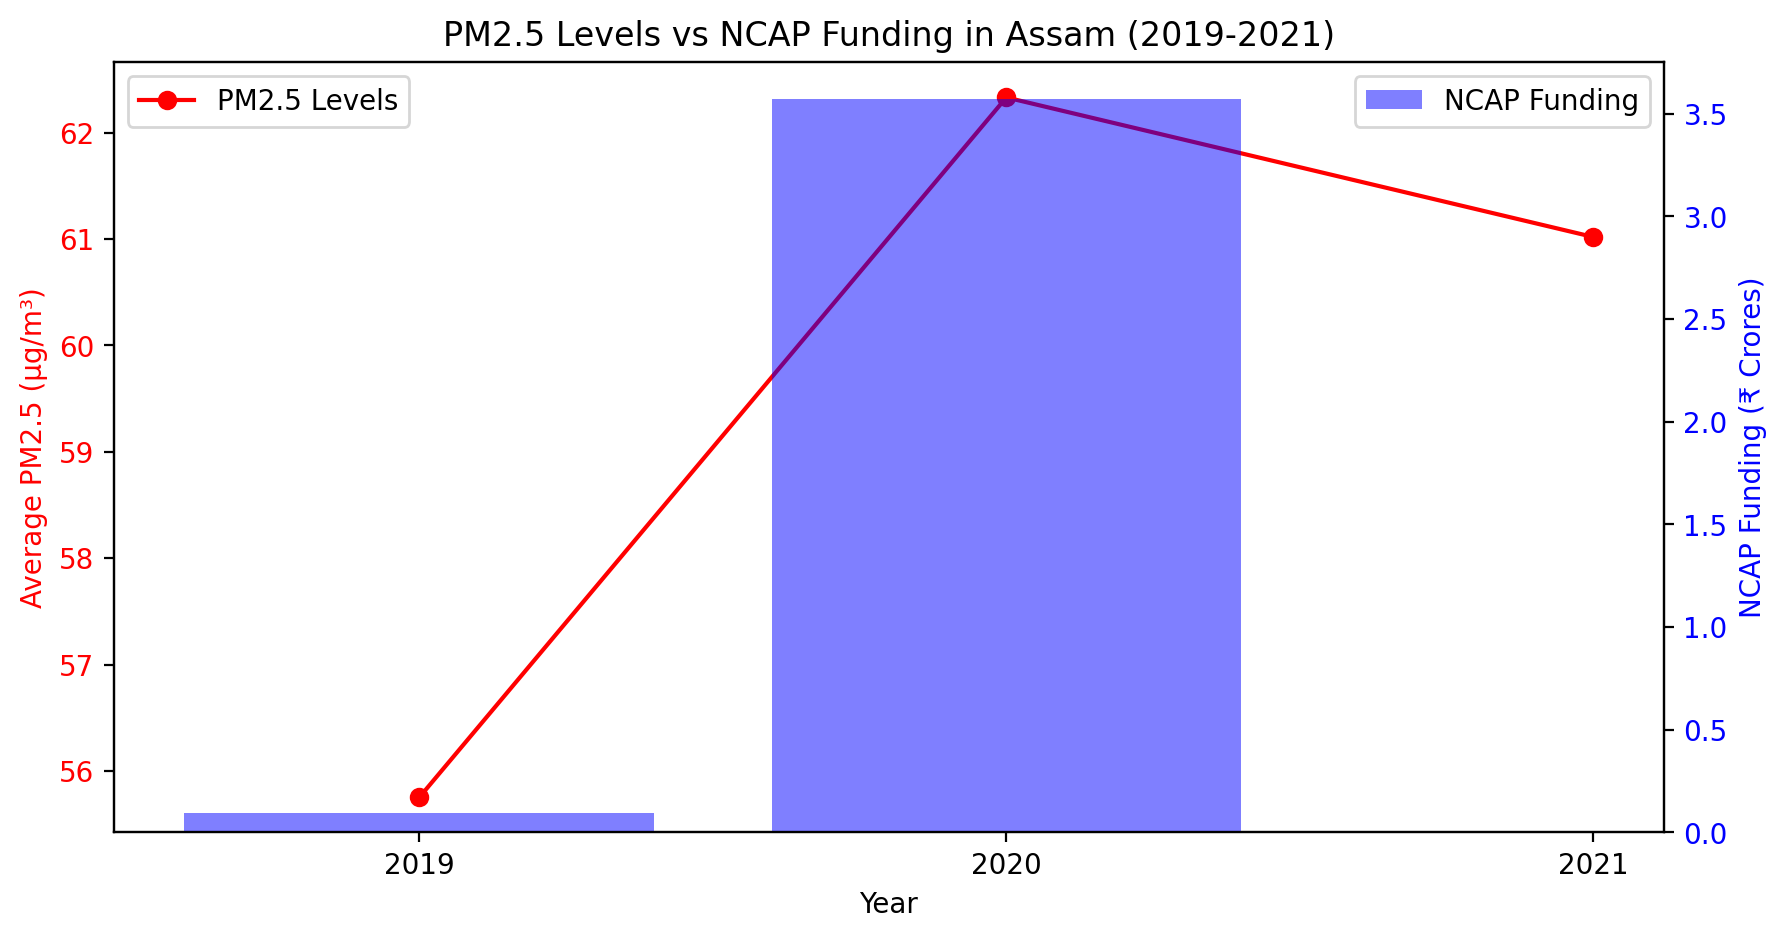

In [ ]:
assam_data = df[df['state'] == 'Assam']

yearly_pm25 = assam_data.groupby("year")["PM2.5"].mean()

yearly_funding = assam_data.groupby("year")[[
    "Amount released during FY 2019-20",
    "Amount released during FY 2020-21",
    "Amount released during FY 2021-22"
]].mean()


yearly_funding.columns = [2019, 2020, 2021]

yearly_funding = yearly_funding.mean()


# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(yearly_pm25.index[yearly_pm25.index <= 2021], yearly_pm25[yearly_pm25.index <= 2021],
         marker='o', color='red', label="PM2.5 Levels")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average PM2.5 (µg/m³)", color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.bar(yearly_funding.index[yearly_funding.index <= 2021], yearly_funding[yearly_funding.index <= 2021],
        alpha=0.5, color='blue', label="NCAP Funding")
ax2.set_ylabel("NCAP Funding (₹ Crores)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks([2019, 2020, 2021])

plt.title("PM2.5 Levels vs NCAP Funding in Assam (2019-2021)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()



The graph suggests that PM2.5 Levels increased from 2019 to 2020 due to less NCAP Funding, while the pollution levels dropped slightly in 2021 after the funding was increased in 2020.

**3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.**

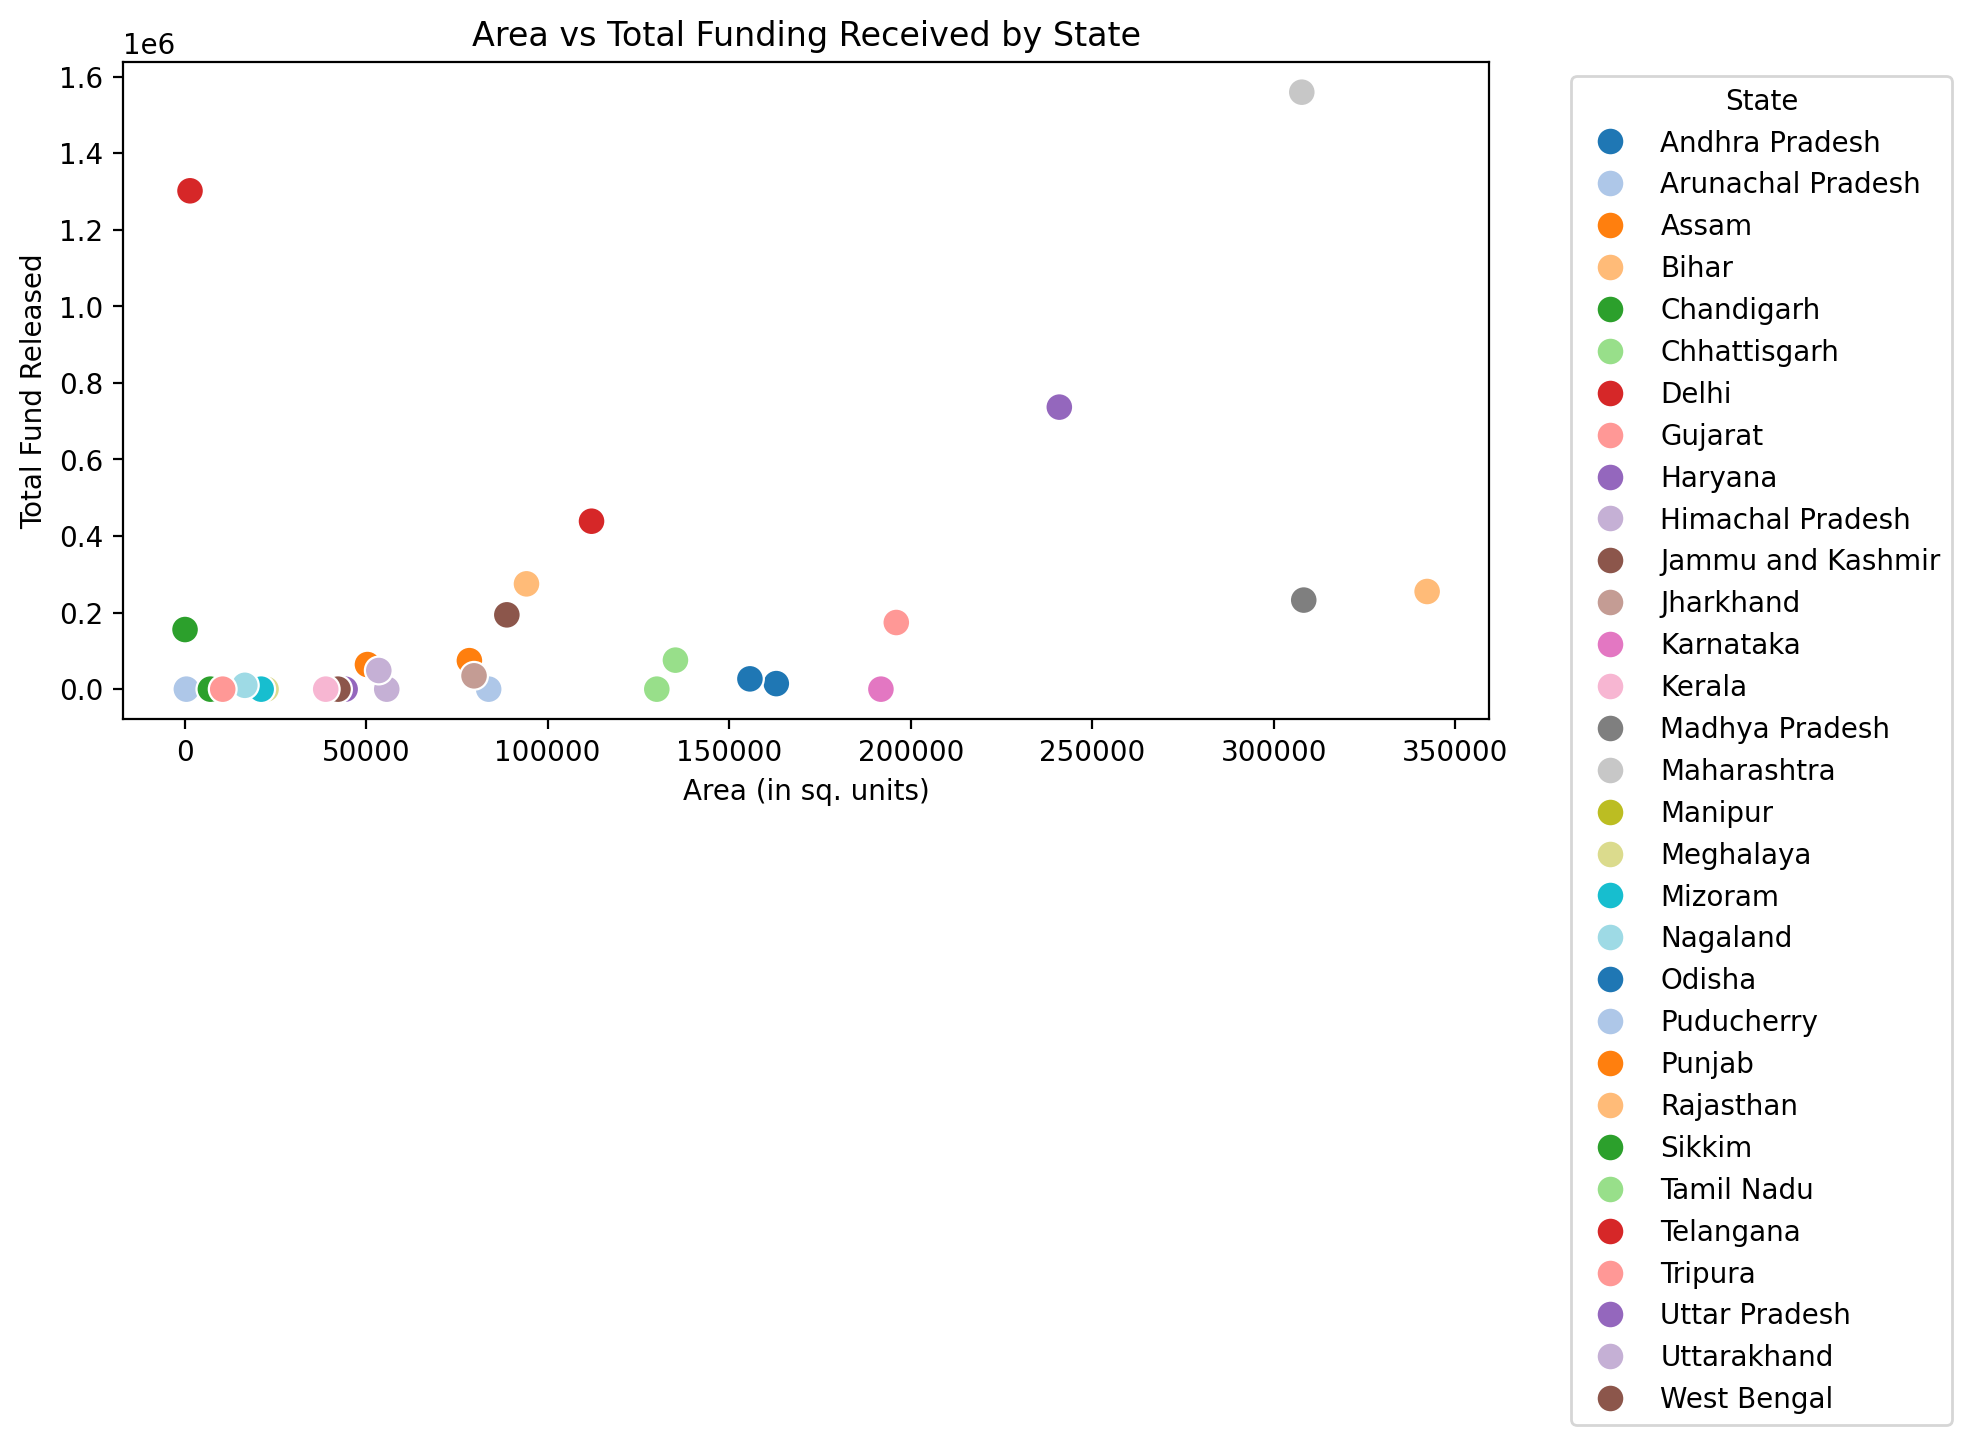

In [ ]:
df_aggregated = df.groupby('state').agg({'Area': 'mean', 'Total fund released': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_aggregated, x='Area', y='Total fund released', hue='state', palette='tab20', s=100)

plt.title('Area vs Total Funding Received by State')
plt.xlabel('Area (in sq. units)')
plt.ylabel('Total Fund Released')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Miscellaneous Questions

**1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)**

In [ ]:
avg_pm25_by_city = df_2023.groupby('city')['PM2.5'].mean()

most_polluted_city = avg_pm25_by_city.idxmax()

city_data = df_2023[df_2023['city'] == most_polluted_city]

hazardous_days = city_data[city_data['PM2.5'] > 300]

total_days = city_data.shape[0]
hazardous_percentage = (hazardous_days.shape[0] / 365) * 100

print(f"The most polluted city in 2023 was {most_polluted_city} with {hazardous_percentage:.2f} percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)")


The most polluted city in 2023 was Darbhanga with 0.82 percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)


**2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

delhi_data = df[(df['city'] == 'Delhi') & (df['year'].isin([2018, 2019, 2020]))]

# Define Diwali and New Year months (October-November for Diwali, December-January for New Year)
diwali_months = [10, 11]
new_year_months = [12, 1]

# Plotting the PM2.5 levels for all years together
plt.figure(figsize=(12, 6))

sns.lineplot(data=delhi_data, x='Timestamp', y='PM2.5')

# Add vertical lines at the start of October and end of January for each year
for year in [2018, 2019, 2020]:

    oct_start = delhi_data[(delhi_data['year'] == year) & (delhi_data['month'] == 10)]['Timestamp'].iloc[0]
    plt.axvline(x=oct_start, color='gray', linestyle='--', lw=1, label='Festive Months' if year == 2018 else "")

    jan_end = delhi_data[(delhi_data['year'] == year) & (delhi_data['month'] == 1)]['Timestamp'].iloc[-1]
    plt.axvline(x=jan_end, color='gray', linestyle='--', lw=1)

peak_points = {
    "2018": ("2018-12-23", 450),
    "2019": ("2019-11-03", 570),
    "2020": ("2020-11-09", 560)
}

for year, (date, value) in peak_points.items():
    plt.annotate('', (pd.to_datetime(date), value),
                 xytext=(pd.to_datetime(date), value + 50),
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=1))

for year in [2018, 2019, 2020]:

    oct_start = delhi_data[(delhi_data['year'] == year) & (delhi_data['month'] == 10)]['Timestamp'].iloc[0]
    jan_end = delhi_data[(delhi_data['year'] == year) & (delhi_data['month'] == 1)]['Timestamp'].iloc[-1]

    plt.axvspan(jan_end, oct_start,  color='yellow', alpha=0.2, label='Regular Months' if year == 2018 else "")

plt.title('PM2.5 Levels in Delhi with Diwali and New Year Highlights (2018-2020)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


Yes, we observe pollution peaks during Diwali and New Year over the years.

**3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.**

State with the highest NCAP funding in 2020: Andhra Pradesh


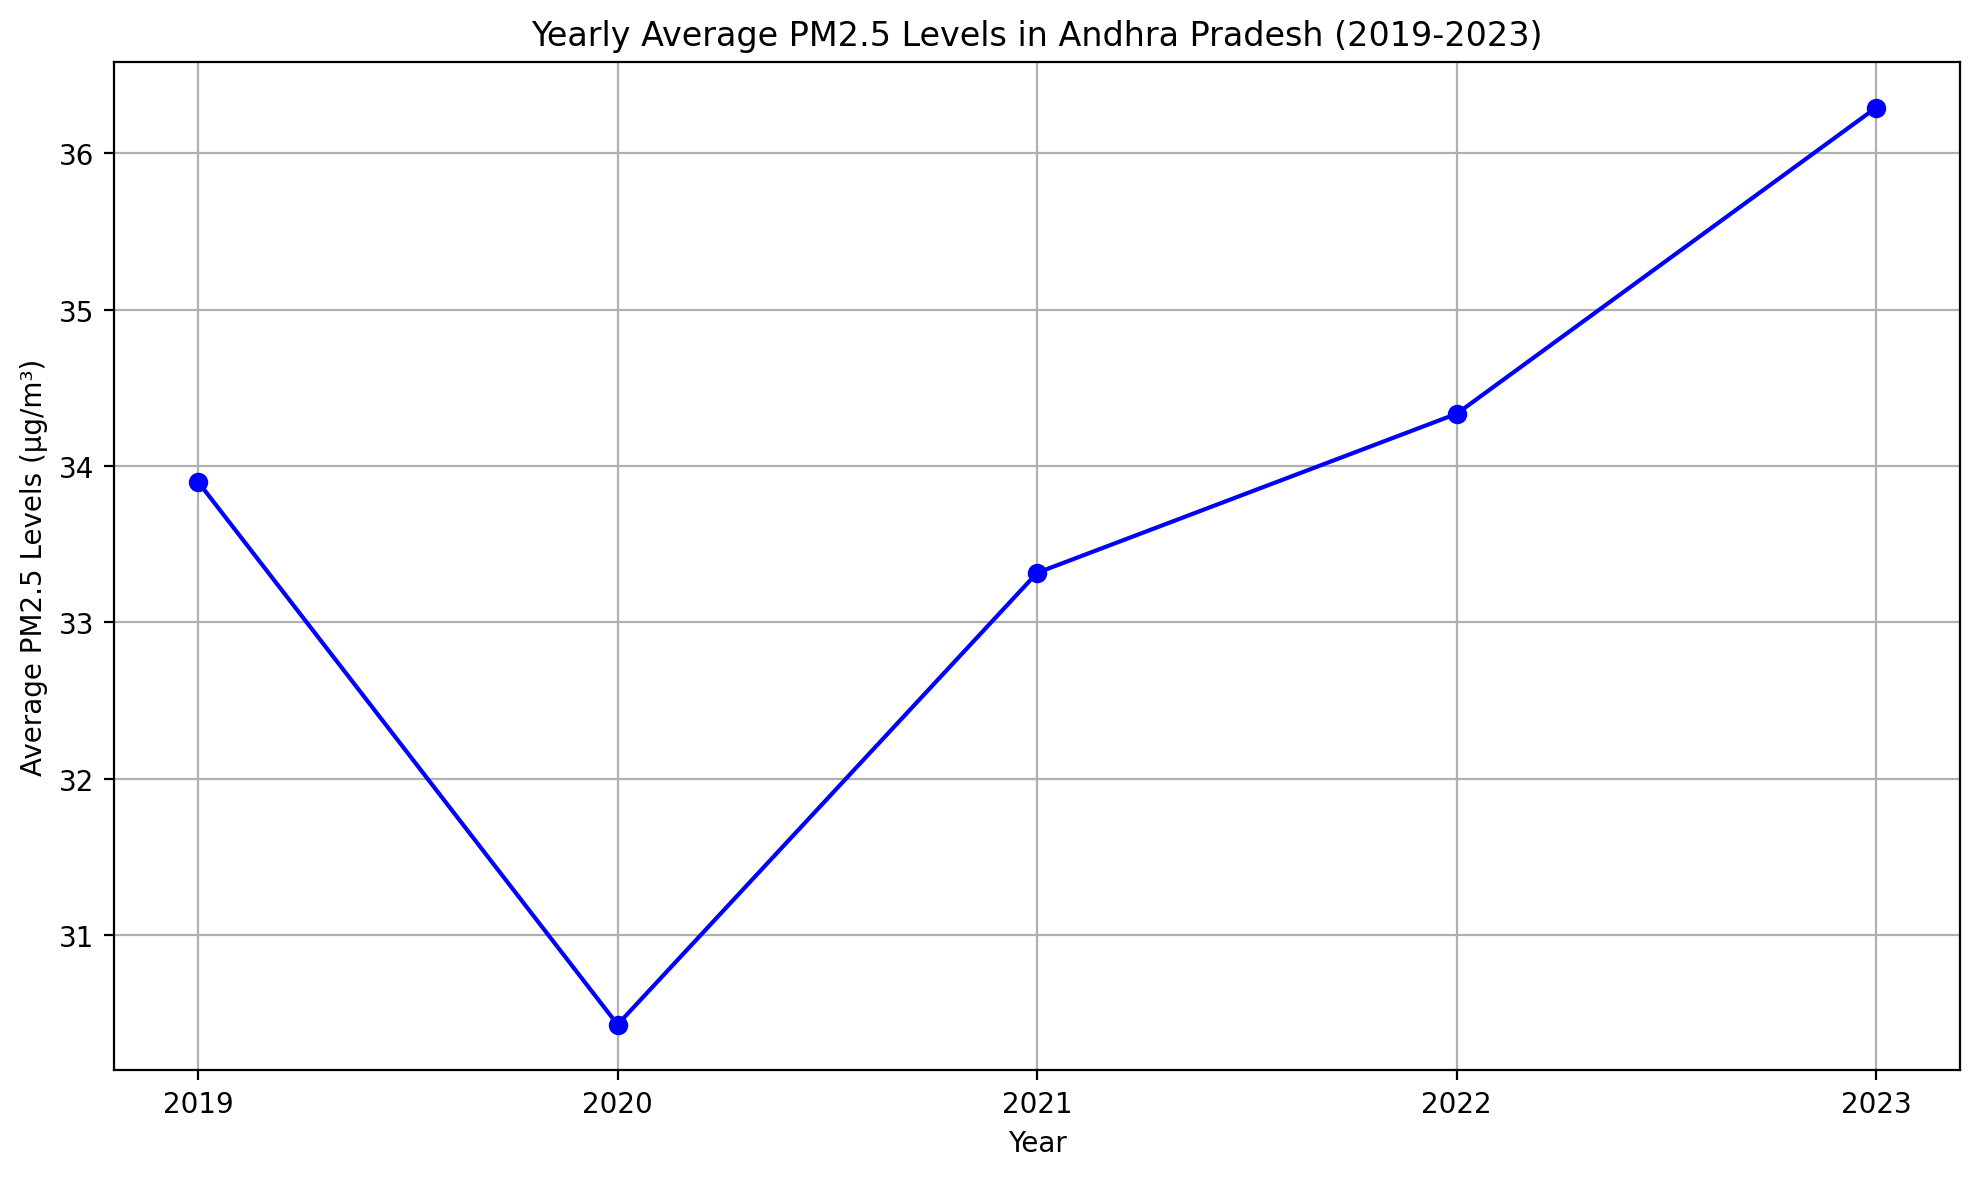

In [ ]:
ncap_df_2020 = ncap_df.groupby('State')['Amount released during FY 2020-21'].sum().reset_index()
max_funding_state = ncap_df_2020.loc[ncap_df_2020['Amount released during FY 2020-21'].idxmax()]['State']
print(f"State with the highest NCAP funding in 2020: {max_funding_state}")

state_data = df[(df['state'] == max_funding_state) & (df['year'].isin([2019, 2020, 2021, 2022, 2023]))]

state_data['PM2.5'] = pd.to_numeric(state_data['PM2.5'], errors='coerce')

avg_pm25_per_year = state_data.groupby('year')['PM2.5'].mean()

# Step 4: Plotting the yearly average PM2.5 trends
plt.figure(figsize=(10, 6))
plt.plot(avg_pm25_per_year.index, avg_pm25_per_year.values, marker='o', linestyle='-', color='b')

plt.title(f'Yearly Average PM2.5 Levels in {max_funding_state} (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels (µg/m³)')
plt.xticks(avg_pm25_per_year.index)
plt.grid(True)
plt.tight_layout()

plt.show()


**4. Draw the map of India and plot the sensor locations on the map.**

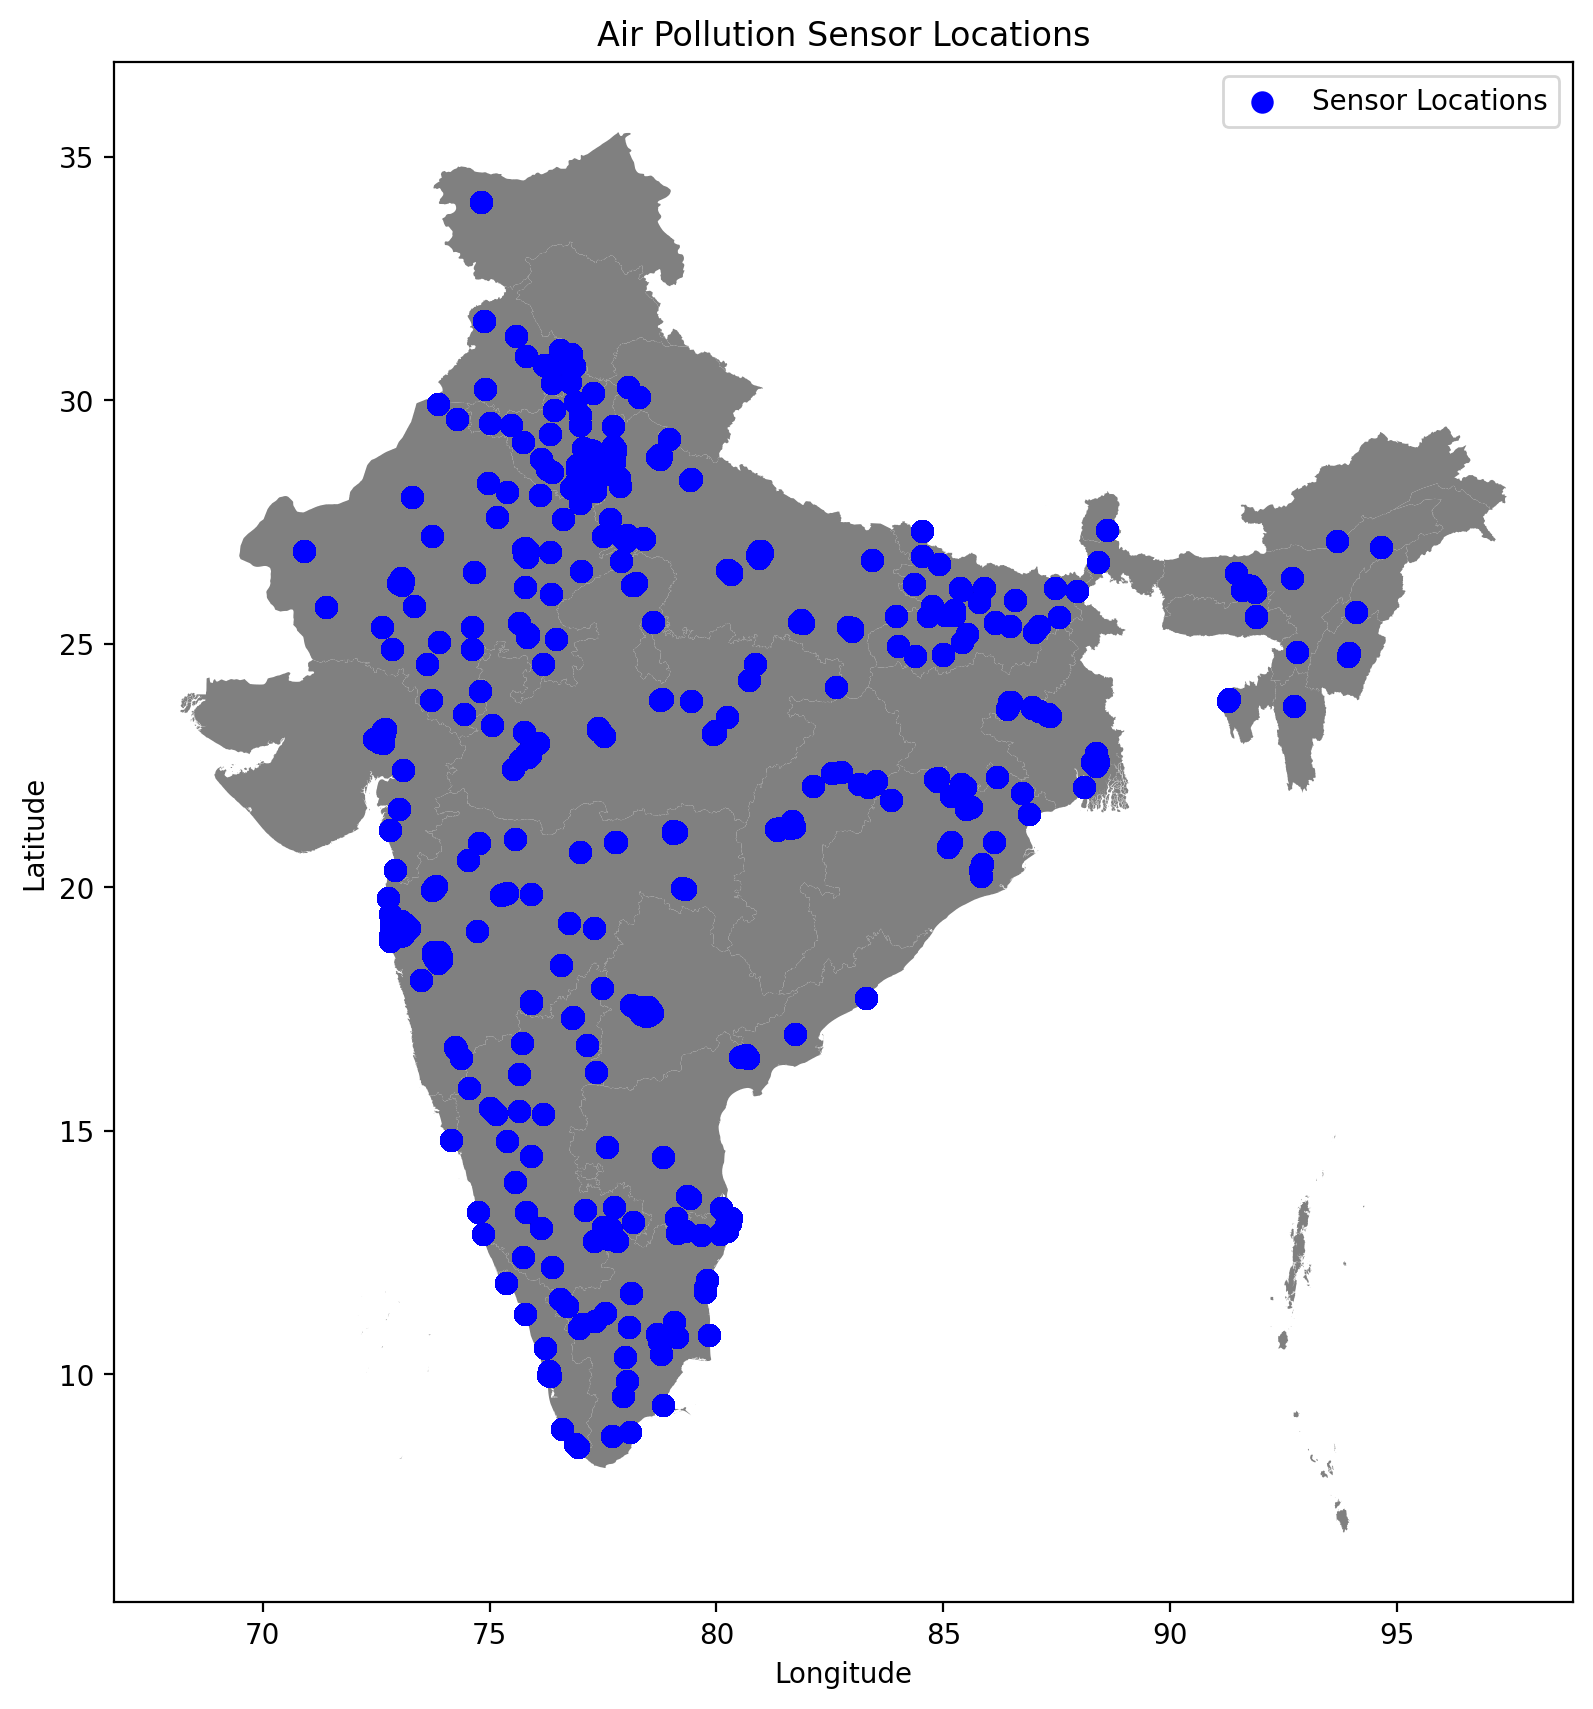

In [5]:
import geopandas
map_data = df.copy()
map_data['latitude'] =  pd.to_numeric(map_data['latitude'], errors='coerce')
map_data['longitude'] =  pd.to_numeric(map_data['longitude'], errors='coerce')
map_data = map_data.dropna(subset=['latitude', 'longitude'])

gdf = geopandas.GeoDataFrame(
    map_data,
    geometry=geopandas.points_from_xy(map_data.longitude, map_data.latitude),
    crs='EPSG:4326'
    )
india = geopandas.read_file('gadm41_IND_shp\gadm41_IND_1.shp')
india = india.to_crs('EPSG:4326')


fig, ax = plt.subplots(1, figsize=(10, 10))
india.plot(color='gray', ax=ax)
gdf.plot(ax=ax, color='blue', markersize=50, label='Sensor Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Air Pollution Sensor Locations')
ax.legend()

plt.show()

# Tell us something new

**1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.**

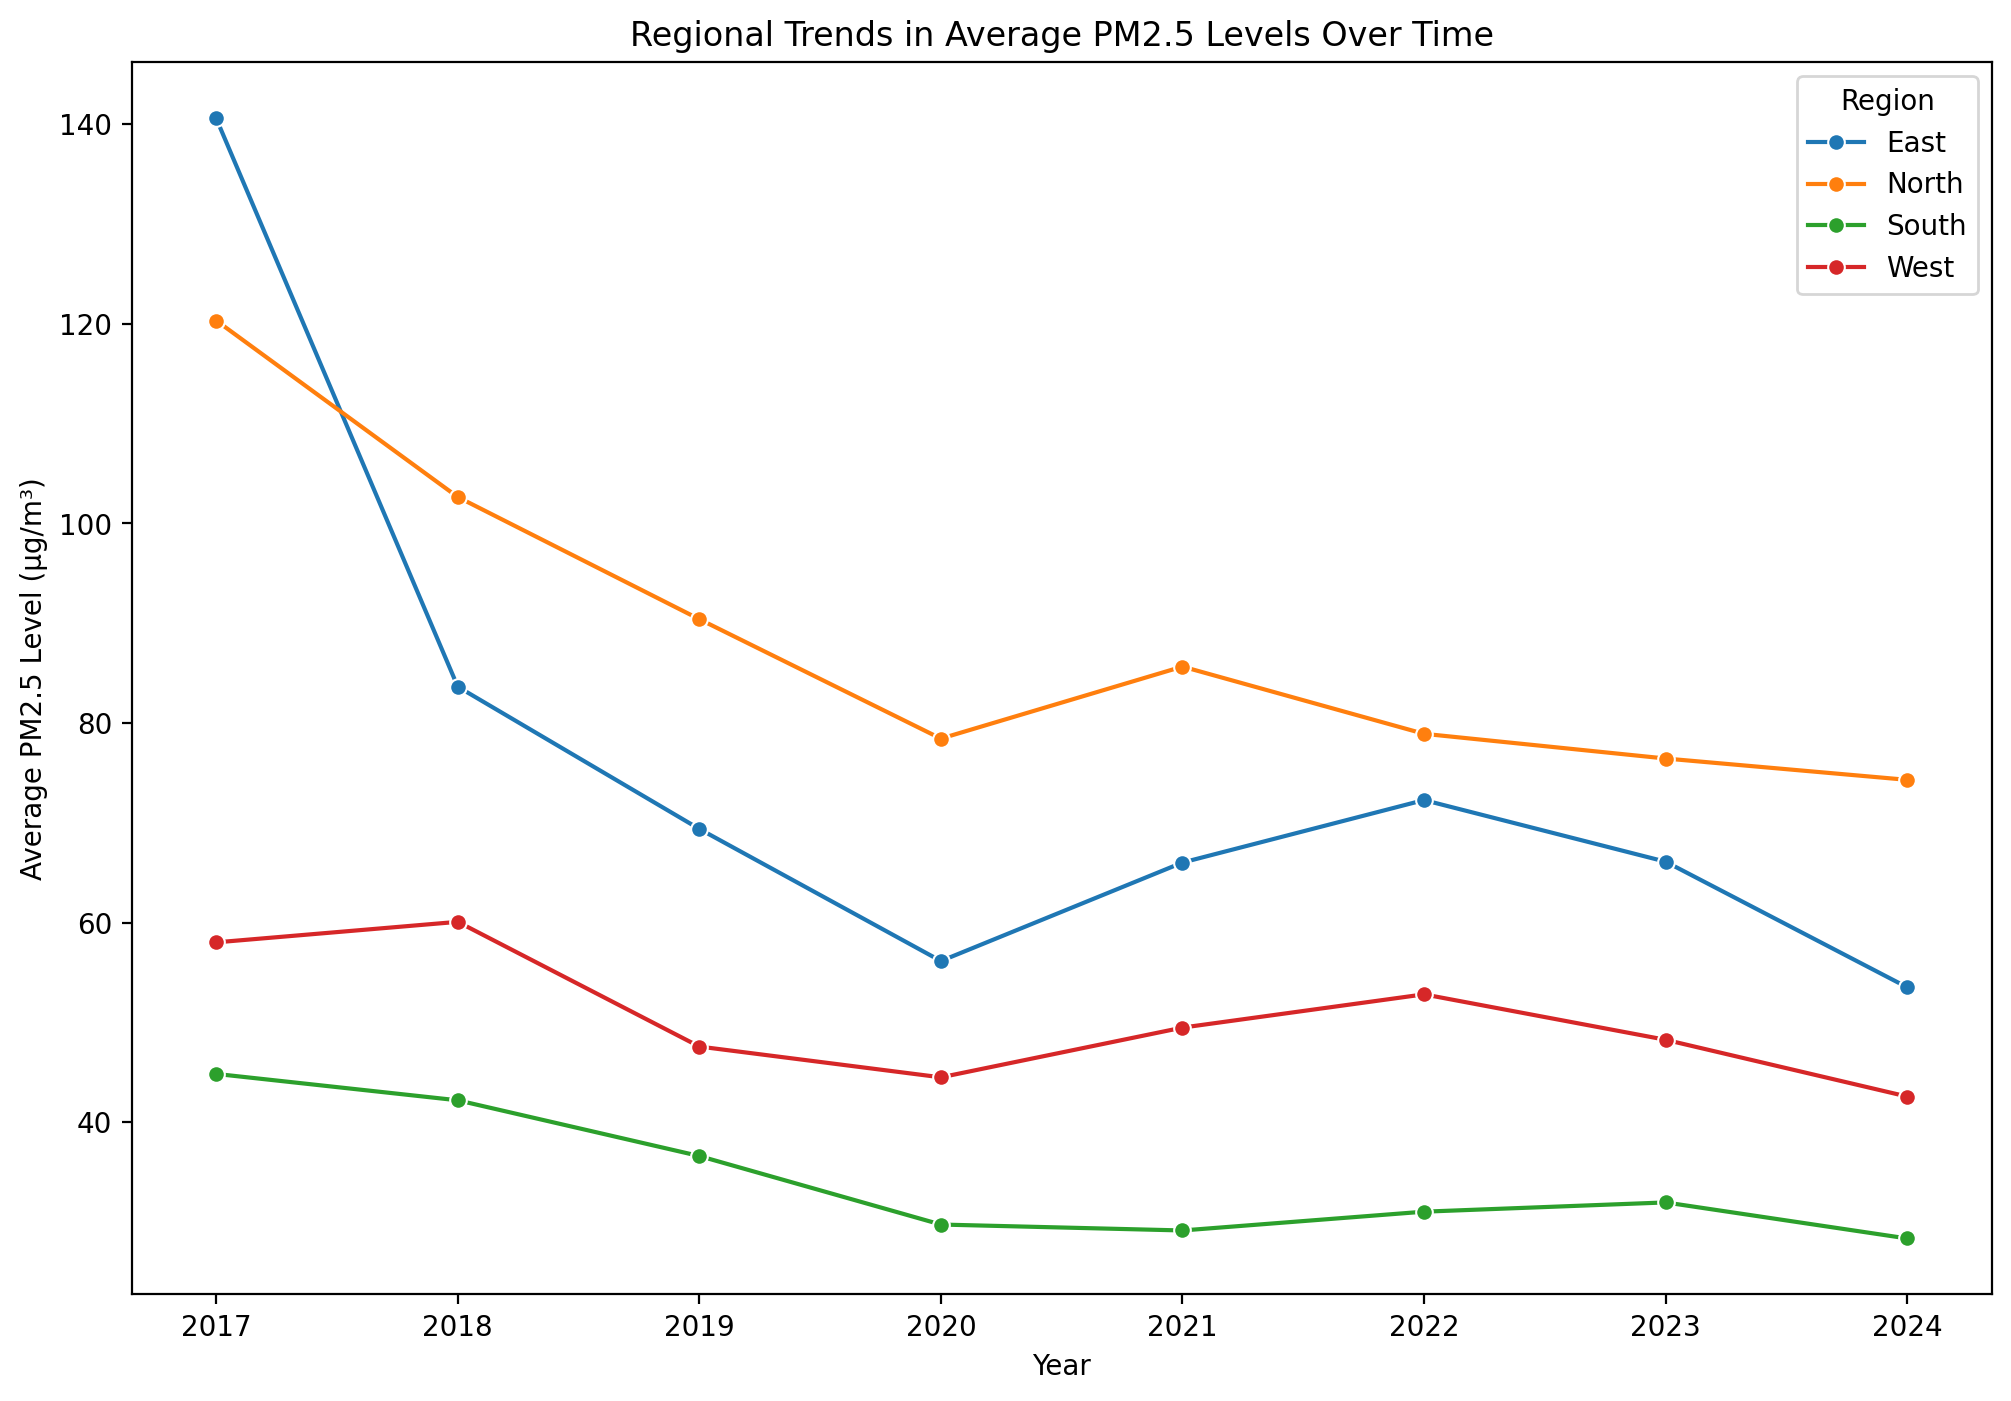

In [ ]:
#Analysis by region (North, South, East, West) to see regional trends.
#This can assist policymakers in targeting specific regions with tailored solutions.

df['region'] = df['state'].apply(lambda x: 'North' if x in ['Delhi', 'Haryana', 'Punjab', 'Uttarakhand', 'Himachal Pradesh', 'Assam', 'Nagaland', 'Manipur', 'Meghalaya', 'Arunachal Pradesh', 'Sikkim'] else
                                       ('South' if x in ['Tamil Nadu', 'Kerala', 'Karnataka', 'Andhra Pradesh', 'Telangana'] else
                                       ('East' if x in ['Bihar', 'West Bengal', 'Odisha', 'Jharkhand', 'Tripura', 'Mizoram'] else
                                       ('West' if x in ['Maharashtra', 'Gujarat', 'Rajasthan', 'Goa', 'Madhya Pradesh'] else None))))

regional_trends = df.groupby(['region', 'year'])['PM2.5'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=regional_trends, x='year', y='PM2.5', hue='region', marker='o')
plt.title('Regional Trends in Average PM2.5 Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level (µg/m³)')
plt.xticks(ticks=regional_trends['year'].unique())
plt.legend(title='Region')
plt.show()



This data shows that southern states are relatively less polluted, while northern states are relatively more polluted. This may help policymakers in allocating more resources to Northern India to combat pollution.